### Base line

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=20)        # 기본 폰트 크기

In [ ]:
ele_car = pd.read_csv("/content/drive/Shareddrives/소부장/데이터/전기차/한국전력공사_지역별 전기차 현황정보_20220429 (1).csv")

ele_car = ele_car.sort_values(by='기준일')


In [ ]:
ele_car["기준일"] = pd.to_datetime(ele_car['기준일'])

자동차 판매량 증가 추세

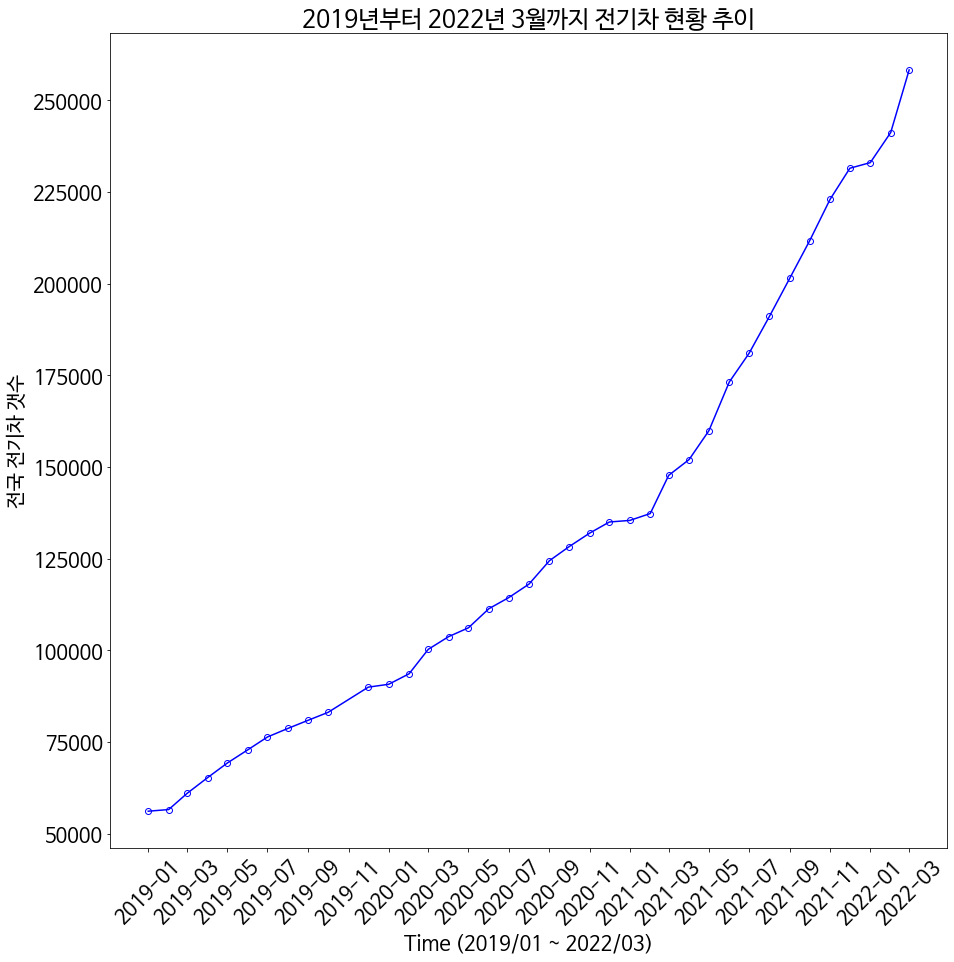

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(ele_car['기준일'], ele_car["합계"],marker='o',markerfacecolor='none', color = "blue")

ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
plt.xticks(rotation=45)

plt.ylabel('전국 전기차 갯수')
plt.xlabel('Time (2019/01 ~ 2022/03)')
plt.title('2019년부터 2022년 3월까지 전기차 현황 추이')
plt.show()

### 전기자동차 갯수가 점점 증가하였으며 2021년도 3월에 제일 큰폭으로 증가하였음을 알 수 있다.

자동차부품과 반도체 재고(지수) 추이 비교

In [5]:
car_dt = pd.read_csv("/content/drive/Shareddrives/소부장/데이터/자동차부품 반도체 재고/재고_연별월별.csv", encoding = "cp949")
car_dt["연도"] = car_dt["연도"].apply(lambda x: str(x)[0:4]+ "/" + str(x)[4:6])
car_dt["연도"] = pd.to_datetime(car_dt['연도'])
car_dt["차이"] = car_dt['자동차부품'] - car_dt['반도체·디스플레이장비']

In [17]:
car_dt1 = car_dt[["자동차부품", '반도체·디스플레이장비']]
sep = car_dt1.iloc[:9]
oct = car_dt1.iloc[9:]
sep

,자동차부품,반도체·디스플레이장비
0,130.5,107.1
1,131.9,96.4
2,130.8,87.5
3,131.6,94.3
4,132.0,95.8
5,133.4,92.2
6,134.0,101.3
7,135.4,97.8
8,137.1,108.4


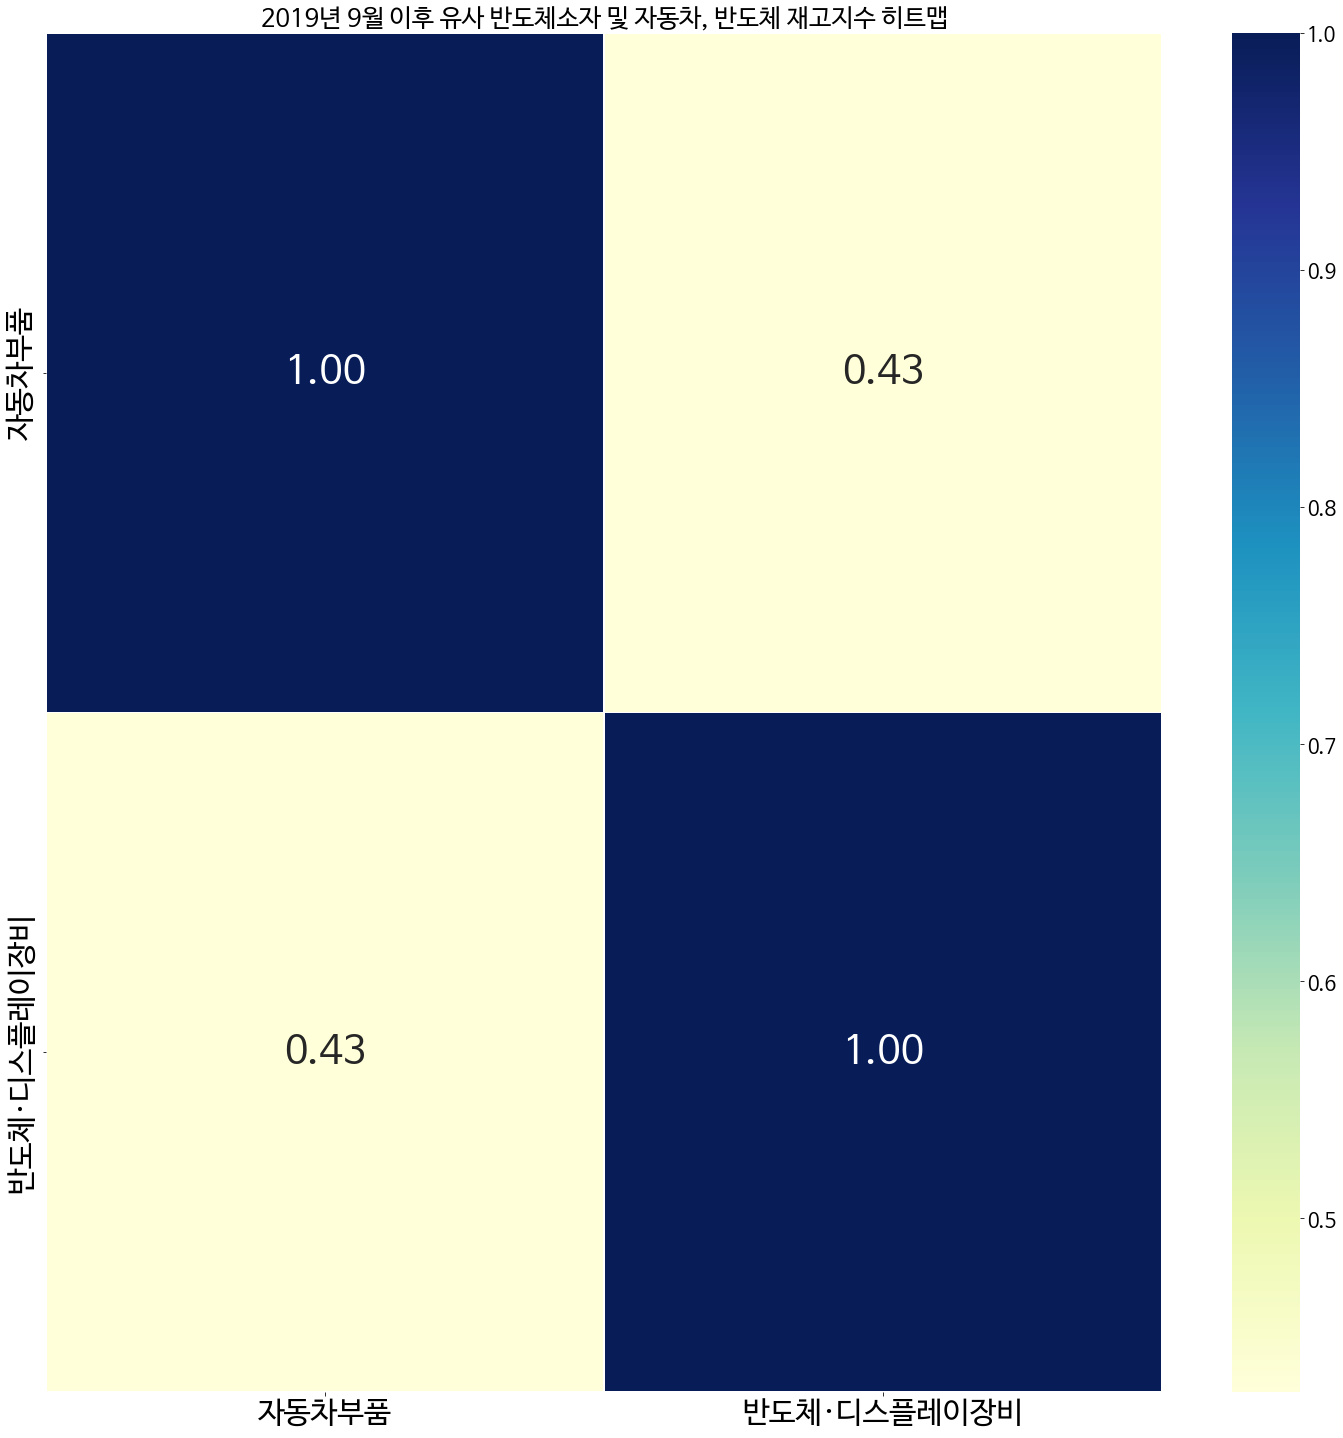

In [18]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(oct.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=30);
plt.title("2019년 9월 이후 유사 반도체소자 및 자동차, 반도체 재고지수 히트맵", fontsize = 25)
plt.show()

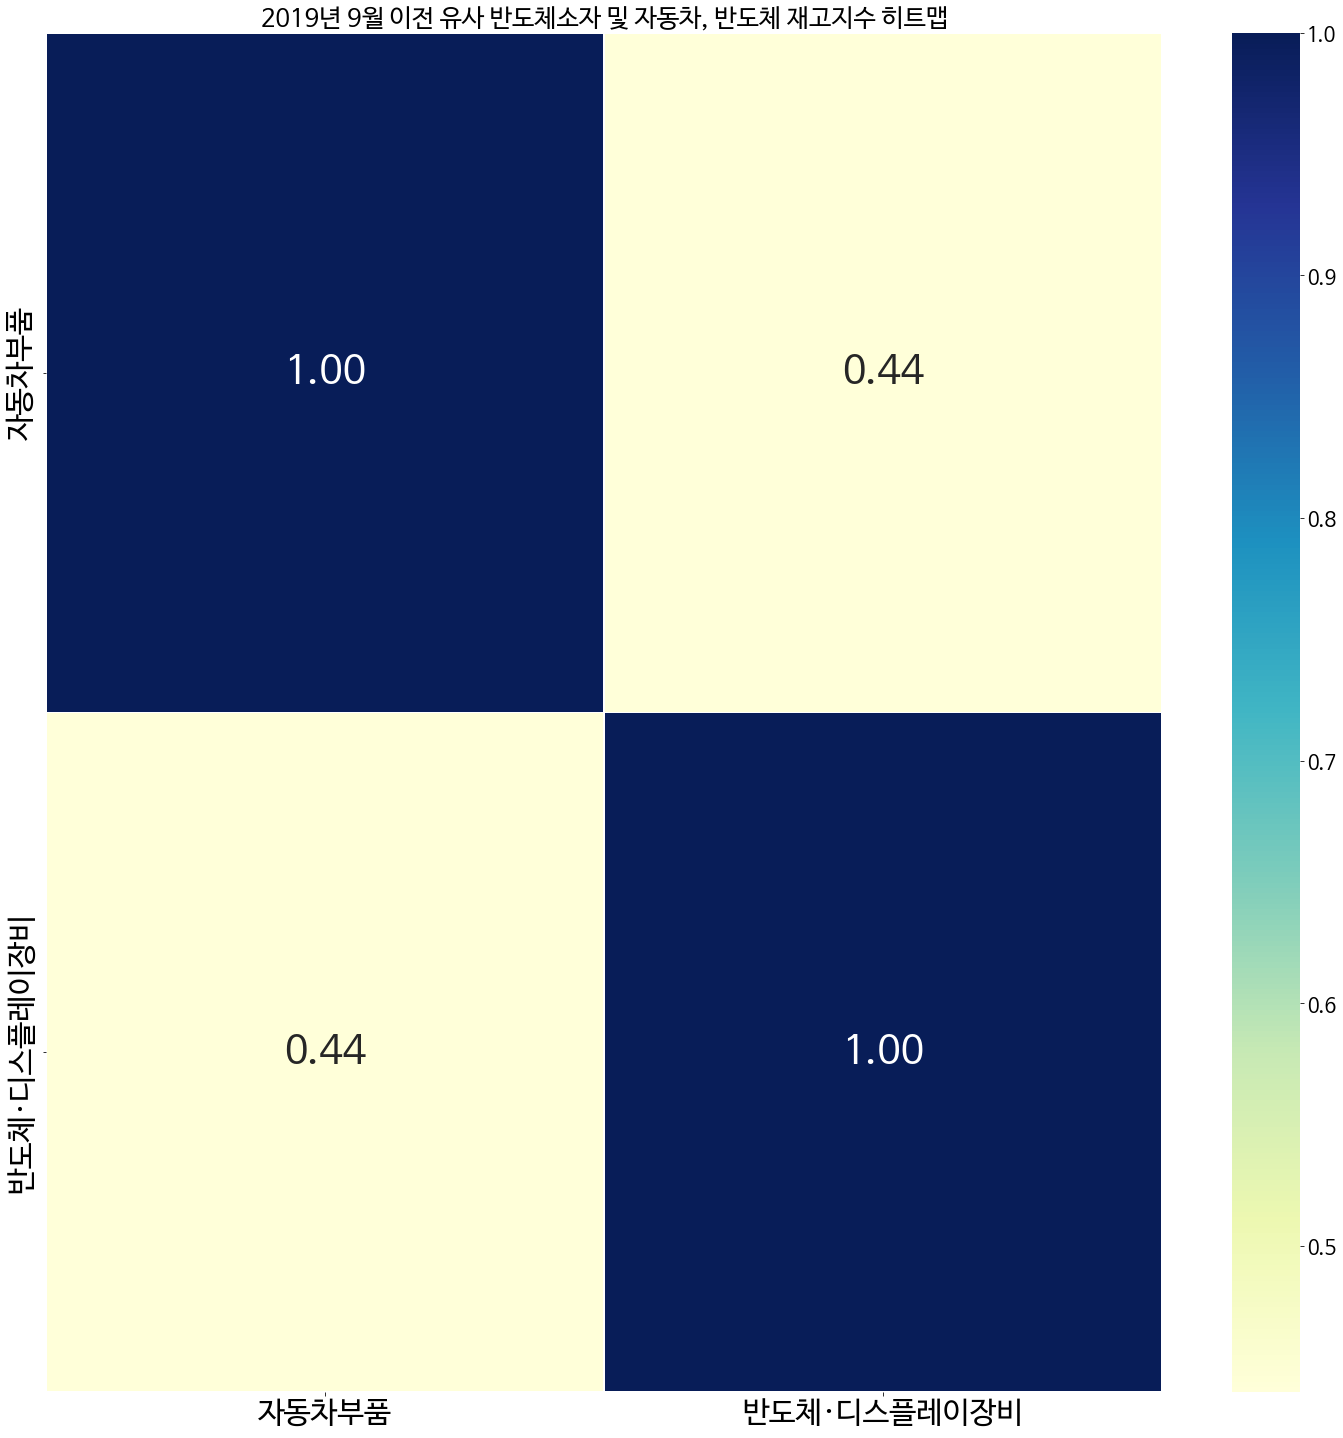

In [19]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(sep.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=30);
plt.title("2019년 9월 이전 유사 반도체소자 및 자동차, 반도체 재고지수 히트맵", fontsize = 25)
plt.show()

In [ ]:
car_dt.columns

Index(['연도', '자동차부품', '반도체·디스플레이장비', '차이'], dtype='object')

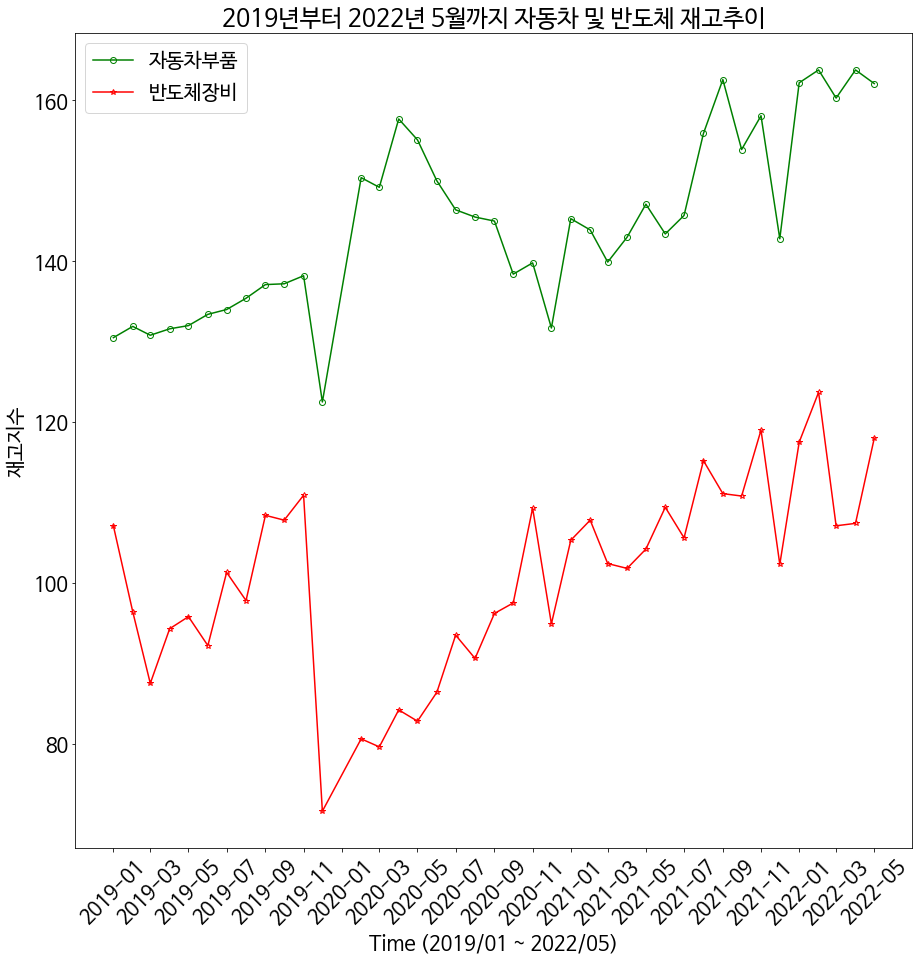

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(car_dt['연도'], car_dt["자동차부품"], marker='o',markerfacecolor='none', color = "green", label = "자동차부품")
ax.plot(car_dt['연도'], car_dt['반도체·디스플레이장비'], marker='*',markerfacecolor='none', color = "red", label = "반도체장비")

plt.ylabel('재고지수')
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 자동차 및 반도체 재고추이')
plt.show()

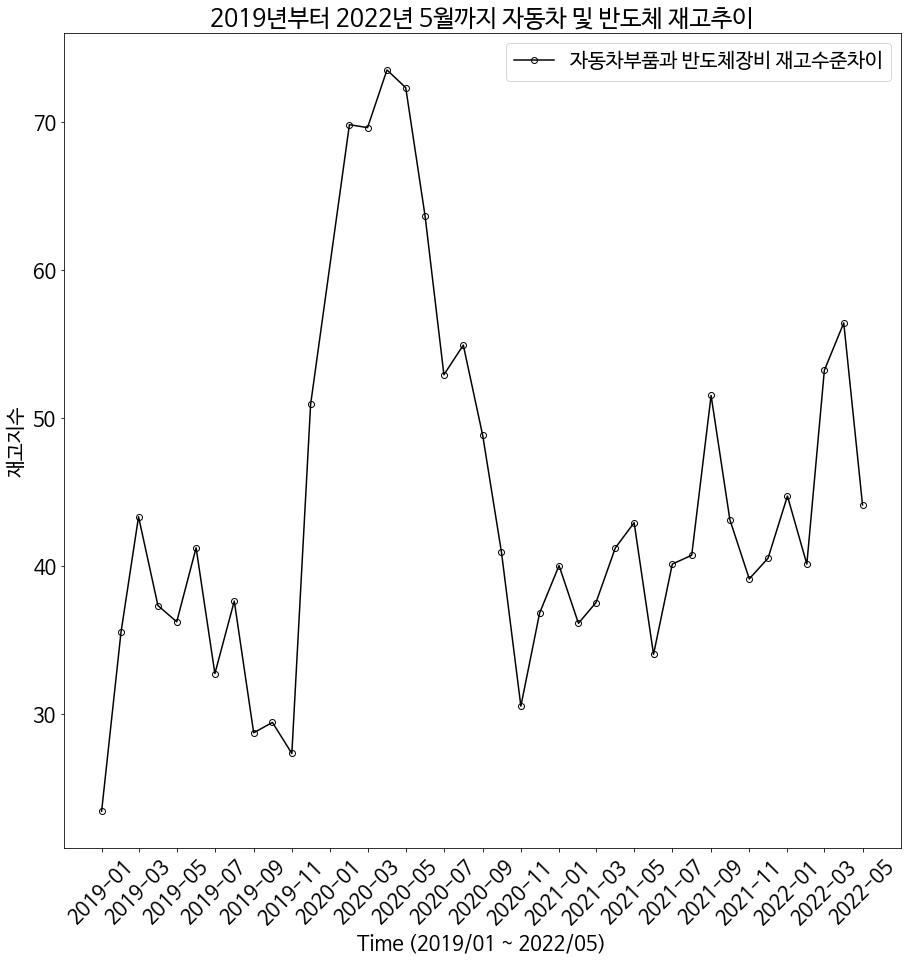

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(car_dt['연도'], car_dt["차이"], marker='o',markerfacecolor='none', color = "black", label = "자동차부품과 반도체장비 재고수준차이")

plt.ylabel('재고지수')
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 자동차 및 반도체 재고추이')
plt.show()

In [ ]:
comp_df = pd.read_csv("/content/drive/Shareddrives/소부장/데이터/산업동향/반도체_산업동향(생산,수출,수입).csv", encoding = "cp949")
comp_df["반도체생산(조원)"] = comp_df["반도체생산(조원)"].replace('-',np.nan)
comp_df


,연도,반도체생산(조원),반도체수출(억불),반도체수입(억불)
0,2012,64.5,504.3,322.4
1,2013,68.1,571.4,346.3
2,2014,72.0,626.5,364.6
3,2015,68.6,629.2,382.8
4,2016,66.3,622.3,366.1
5,2017,102.7,979.4,411.8
6,2018,143.3,"1,267.1",447.3
7,2019,134.4,939.0,470.0
8,2020,158.7,992.0,503.0
9,2021,NaN,"1,279.8",614.0


In [ ]:
comp_df["반도체수출(억불)"] = comp_df["반도체수출(억불)"].str.replace(',','')
#comp_df["반도체수출(억불)"] = comp_df["반도체수출(억불)"].astype(float)
comp_df = comp_df.astype(float)
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연도         10 non-null     float64
 1   반도체생산(조원)  9 non-null      float64
 2   반도체수출(억불)  10 non-null     float64
 3   반도체수입(억불)  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes


In [ ]:
comp_df["반도체수출(조원)"] = comp_df["반도체수출(억불)"] * 0.1423  ### 단위맞추기위함 
comp_df["반도체수입(조원)"] = comp_df["반도체수입(억불)"] * 0.1423  ### 단위맞추기위함 

comp_df

,연도,반도체생산(조원),반도체수출(억불),반도체수입(억불),반도체수출(조원),반도체수입(조원)
0,2012.0,64.5,504.3,322.4,71.76189,45.87752
1,2013.0,68.1,571.4,346.3,81.31022,49.27849
2,2014.0,72.0,626.5,364.6,89.15095,51.88258
3,2015.0,68.6,629.2,382.8,89.53516,54.47244
4,2016.0,66.3,622.3,366.1,88.55329,52.09603
5,2017.0,102.7,979.4,411.8,139.36862,58.59914
6,2018.0,143.3,1267.1,447.3,180.30833,63.65079
7,2019.0,134.4,939.0,470.0,133.61970,66.88100
8,2020.0,158.7,992.0,503.0,141.16160,71.57690
9,2021.0,NaN,1279.8,614.0,182.11554,87.37220


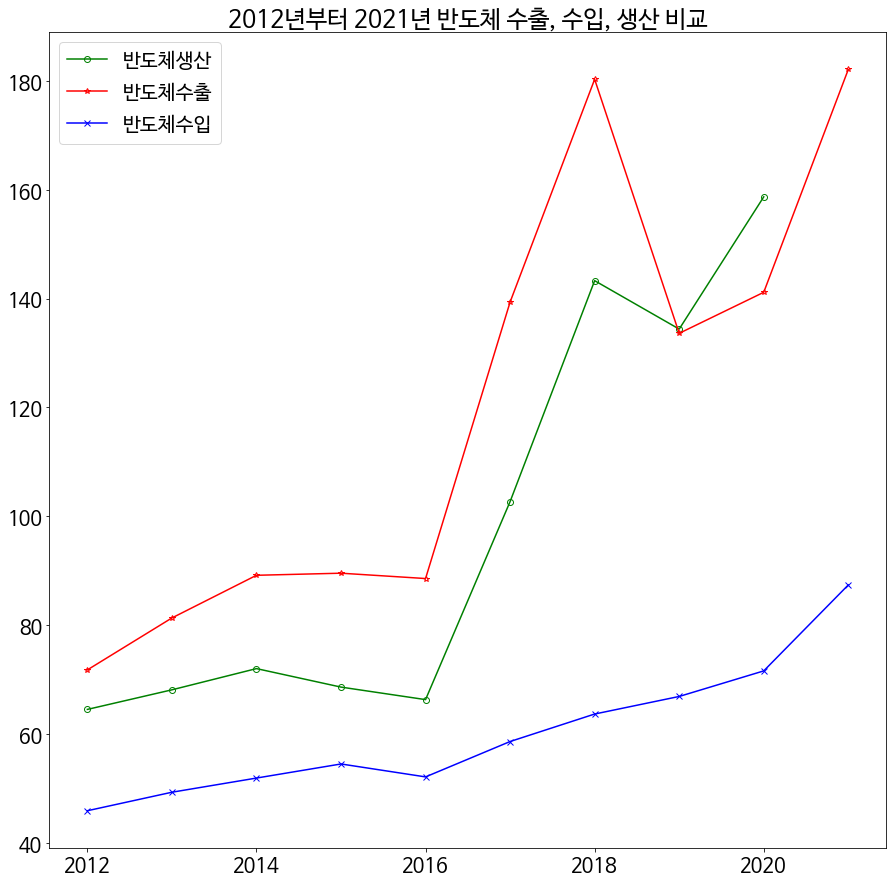

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(comp_df['연도'], comp_df["반도체생산(조원)"], marker='o',markerfacecolor='none', color = "green", label = "반도체생산")
ax.plot(comp_df['연도'], comp_df['반도체수출(조원)'], marker='*',markerfacecolor='none', color = "red", label = "반도체수출")
ax.plot(comp_df['연도'], comp_df['반도체수입(조원)'], marker='x',markerfacecolor='none', color = "blue", label = "반도체수입")
plt.legend()

plt.title('2012년부터 2021년 반도체 수출, 수입, 생산 비교')
plt.show()

In [13]:
sobu_df = pd.read_csv("/content/drive/Shareddrives/소부장/데이터/소부장데이터/소부장넷_다이오드-반도체-자동차부품_생산-재고지수.csv", encoding = "cp949")
sobu_df["연도"] = pd.to_datetime(sobu_df['연도'])
sobu_df

,연도,"다이오드, 트랜지스터 및 유사 반도체소자-생산지수","다이오드, 트랜지스터 및 유사 반도체소자-재고지수",자동차부품-생산지수,자동차부품-재고지수,반도체·디스플레이장비-생산지수,반도체·디스플레이장비-재고지수
0,2019-01-01,155.0,124.0,101.9,130.5,111.6,107.1
1,2019-02-01,137.9,129.9,82.2,131.9,104.9,96.4
2,2019-03-01,166.3,120.6,102.5,130.8,124.9,87.5
3,2019-04-01,154.3,130.5,105.6,131.6,116.5,94.3
4,2019-05-01,158.7,125.9,104.7,132.0,116.8,95.8
5,2019-06-01,167.6,119.5,97.6,133.4,124.6,92.2
6,2019-07-01,170.2,137.3,106.2,134.0,107.8,101.3
7,2019-08-01,168.8,131.9,84.6,135.4,98.4,97.8
8,2019-09-01,177.0,124.3,89.8,137.1,113.9,108.4
9,2019-10-01,174.6,135.7,103.7,137.2,109.6,107.8


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
sobu_df1 = sobu_df[['다이오드, 트랜지스터 및 유사 반도체소자-재고지수', '자동차부품-재고지수', '반도체·디스플레이장비-재고지수']]
sobu_df1.columns = ['유사 반도체소자-재고지수', '자동차부품-재고지수', '반도체-재고지수']
sep1 = sobu_df1.iloc[:12]
oct2 = sobu_df1.iloc[12:]

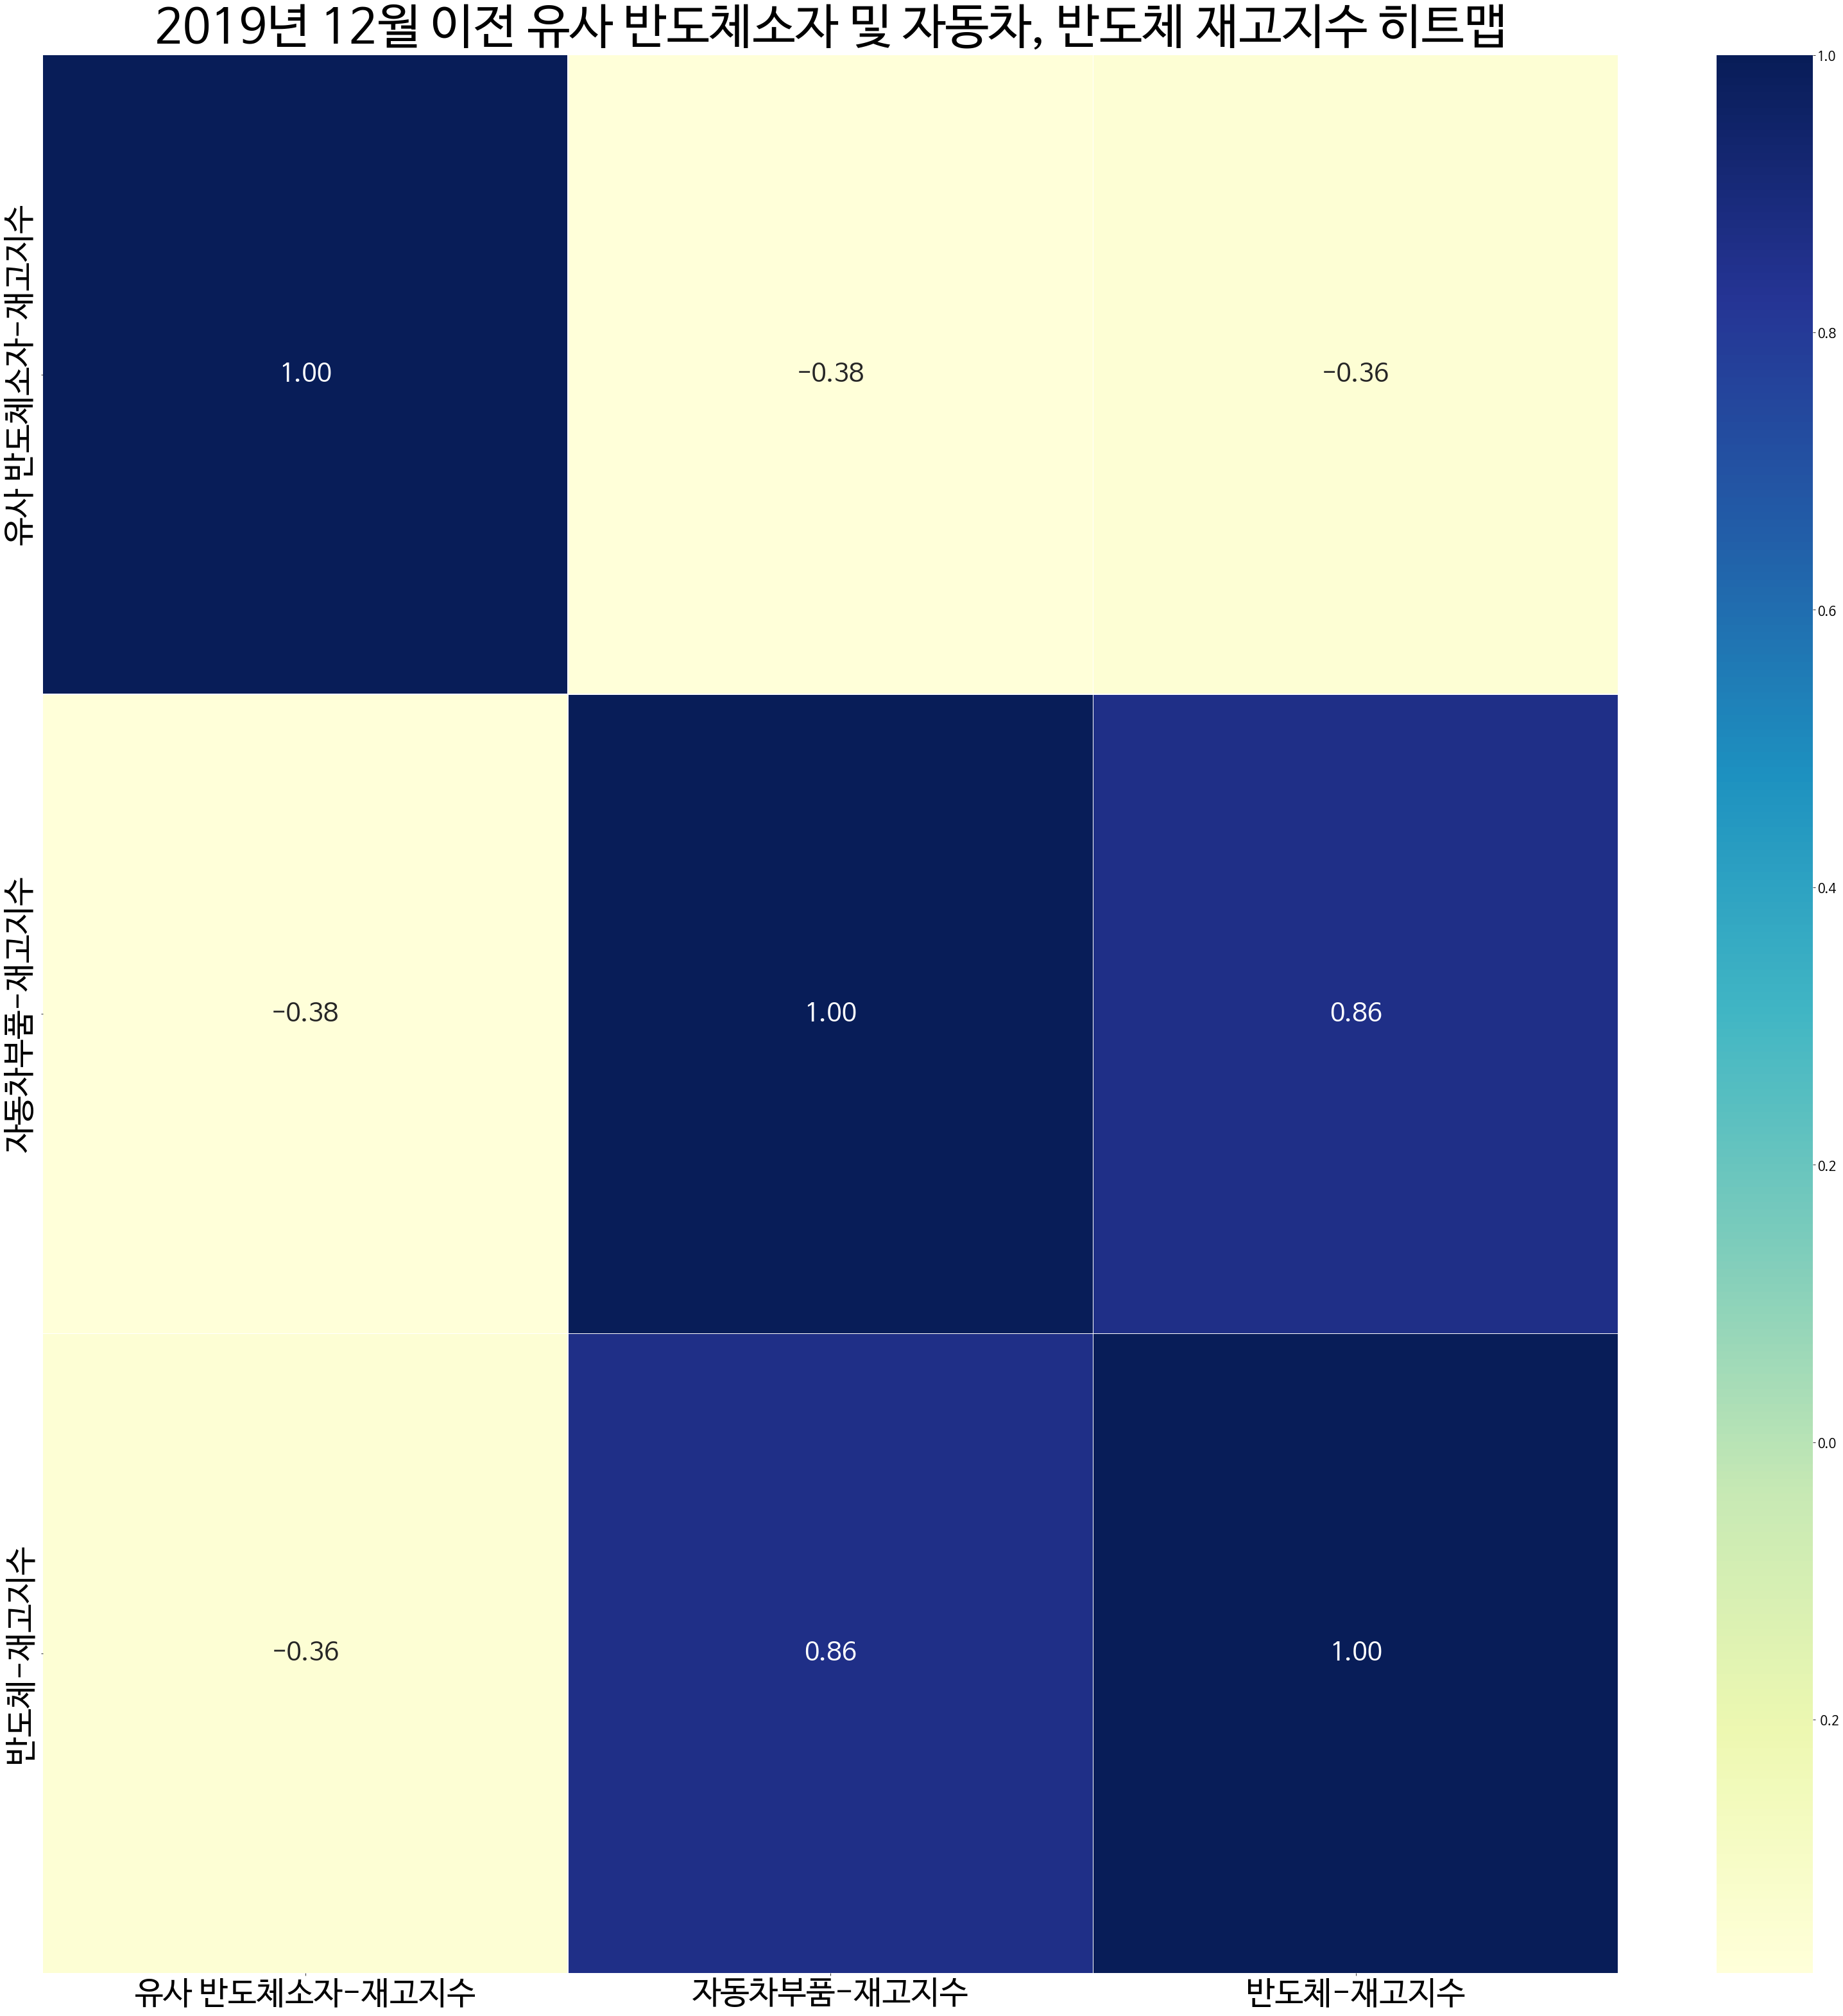

In [37]:
fig, ax = plt.subplots(figsize=(55,55))
sns.heatmap(sep1.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.title("2019년 12월 이전 유사 반도체소자 및 자동차, 반도체 재고지수 히트맵", fontsize = 75)
plt.show()


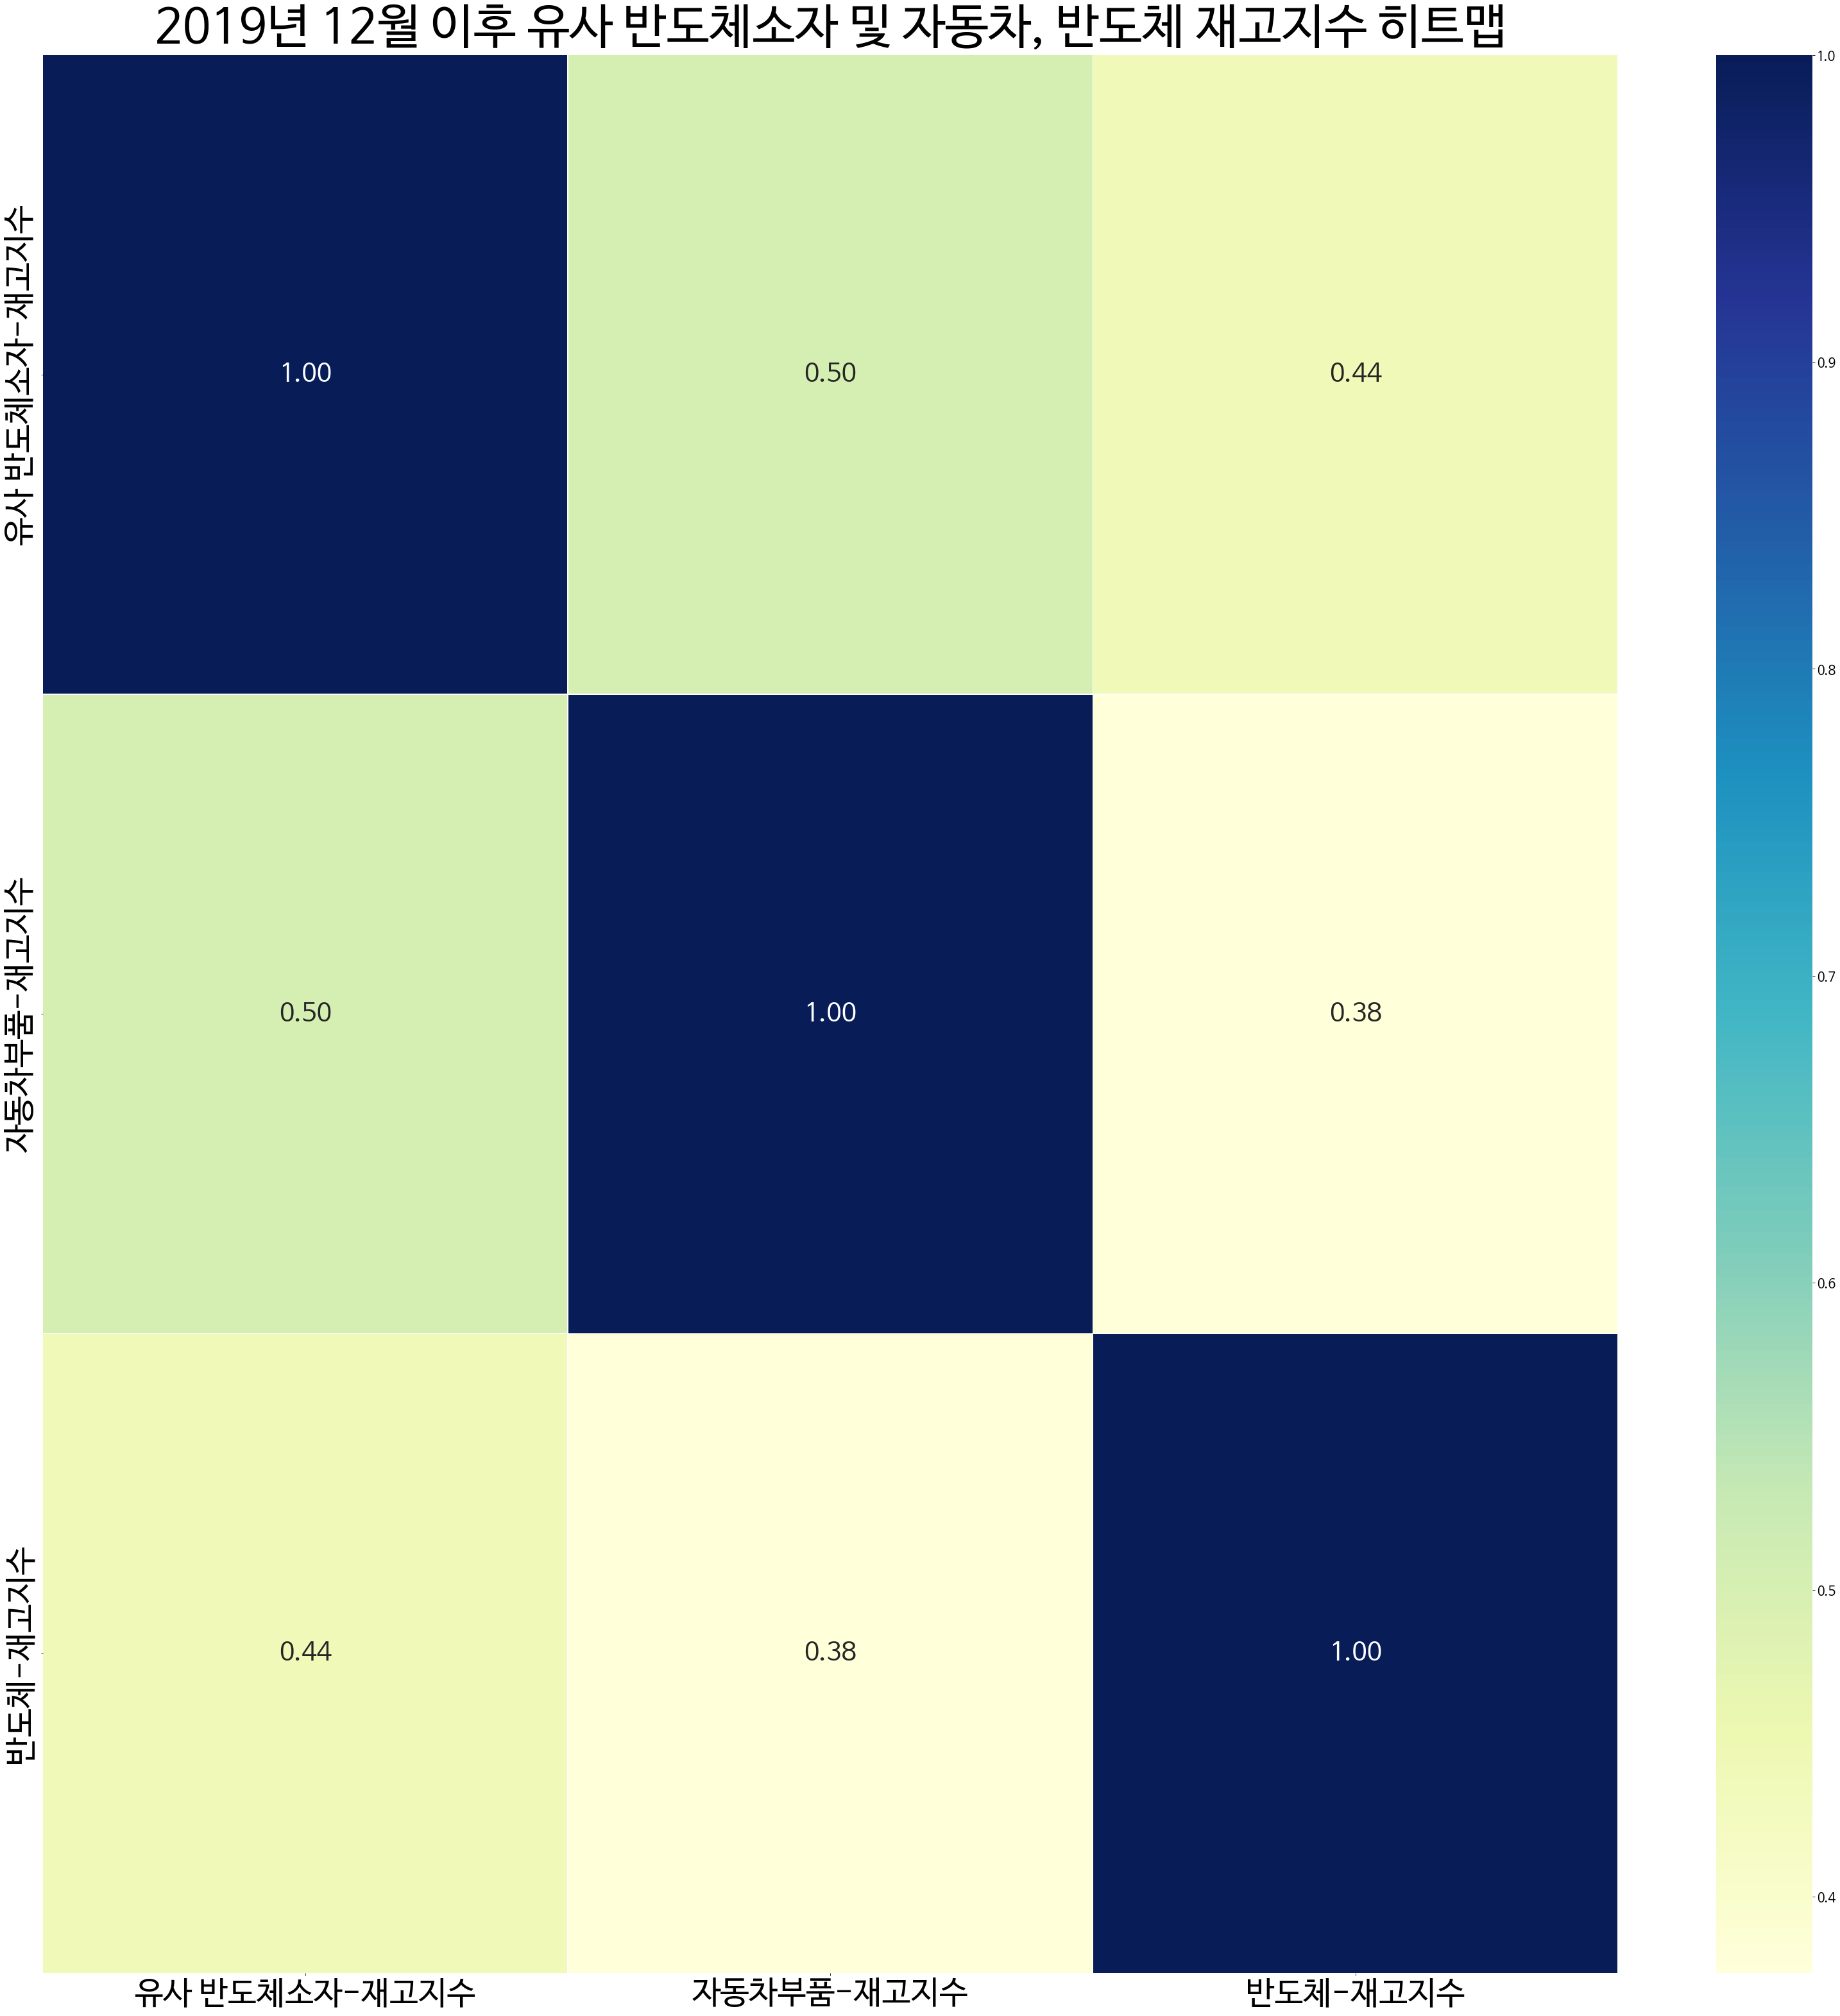

In [38]:
fig, ax = plt.subplots(figsize=(55,55))
sns.heatmap(oct2.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.title("2019년 12월 이후 유사 반도체소자 및 자동차, 반도체 재고지수 히트맵", fontsize = 75)
plt.show()


In [ ]:
sobu_df.columns

Index(['연도', '다이오드, 트랜지스터 및 유사 반도체소자-생산지수', '다이오드, 트랜지스터 및 유사 반도체소자-재고지수',
       '자동차부품-생산지수', '자동차부품-재고지수', '반도체·디스플레이장비-생산지수', '반도체·디스플레이장비-재고지수'],
      dtype='object')

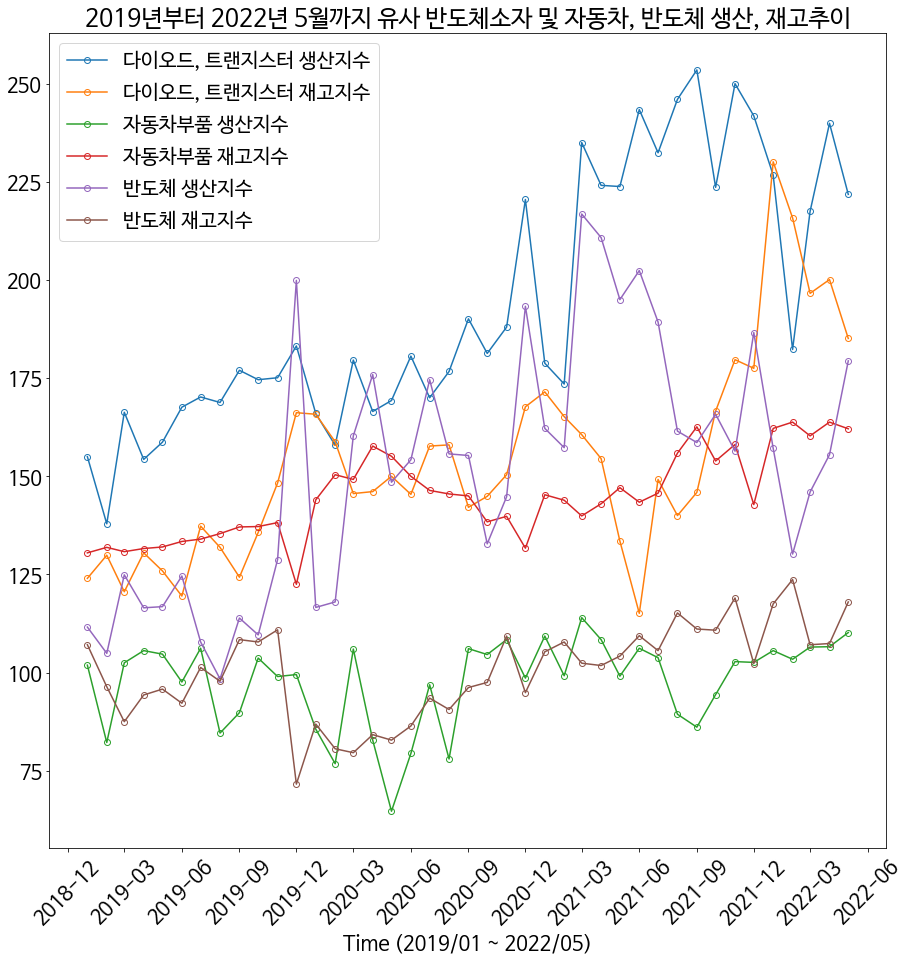

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(sobu_df['연도'], sobu_df["다이오드, 트랜지스터 및 유사 반도체소자-생산지수"], marker='o',markerfacecolor='none', label = "다이오드, 트랜지스터 생산지수")
ax.plot(sobu_df['연도'], sobu_df["다이오드, 트랜지스터 및 유사 반도체소자-재고지수"], marker='o',markerfacecolor='none', label = "다이오드, 트랜지스터 재고지수")
ax.plot(sobu_df['연도'], sobu_df["자동차부품-생산지수"], marker='o',markerfacecolor='none', label = "자동차부품 생산지수")
ax.plot(sobu_df['연도'], sobu_df["자동차부품-재고지수"], marker='o',markerfacecolor='none', label = "자동차부품 재고지수")
ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-생산지수'], marker='o',markerfacecolor='none', label = "반도체 생산지수")
ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-재고지수'], marker='o',markerfacecolor='none', label = "반도체 재고지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 유사 반도체소자 및 자동차, 반도체 생산, 재고추이')
plt.show()

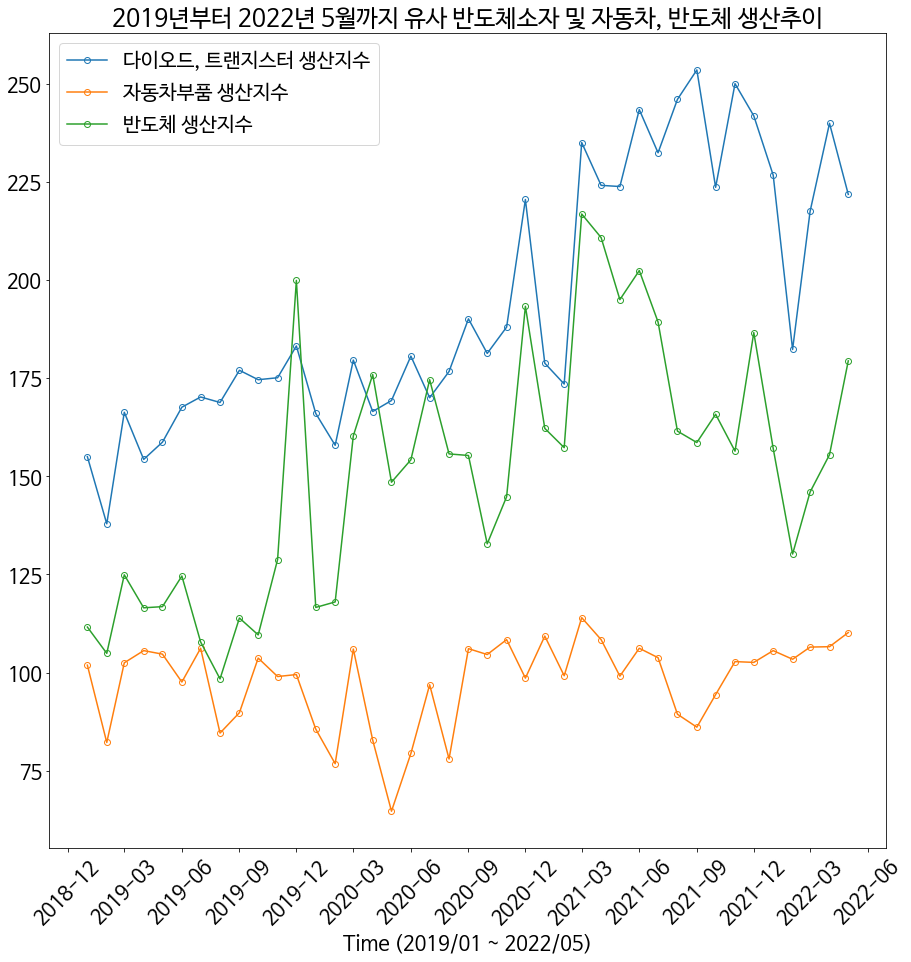

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(sobu_df['연도'], sobu_df["다이오드, 트랜지스터 및 유사 반도체소자-생산지수"], marker='o',markerfacecolor='none', label = "다이오드, 트랜지스터 생산지수")
ax.plot(sobu_df['연도'], sobu_df["자동차부품-생산지수"], marker='o',markerfacecolor='none', label = "자동차부품 생산지수")
ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-생산지수'], marker='o',markerfacecolor='none', label = "반도체 생산지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 유사 반도체소자 및 자동차, 반도체 생산추이')
plt.show()

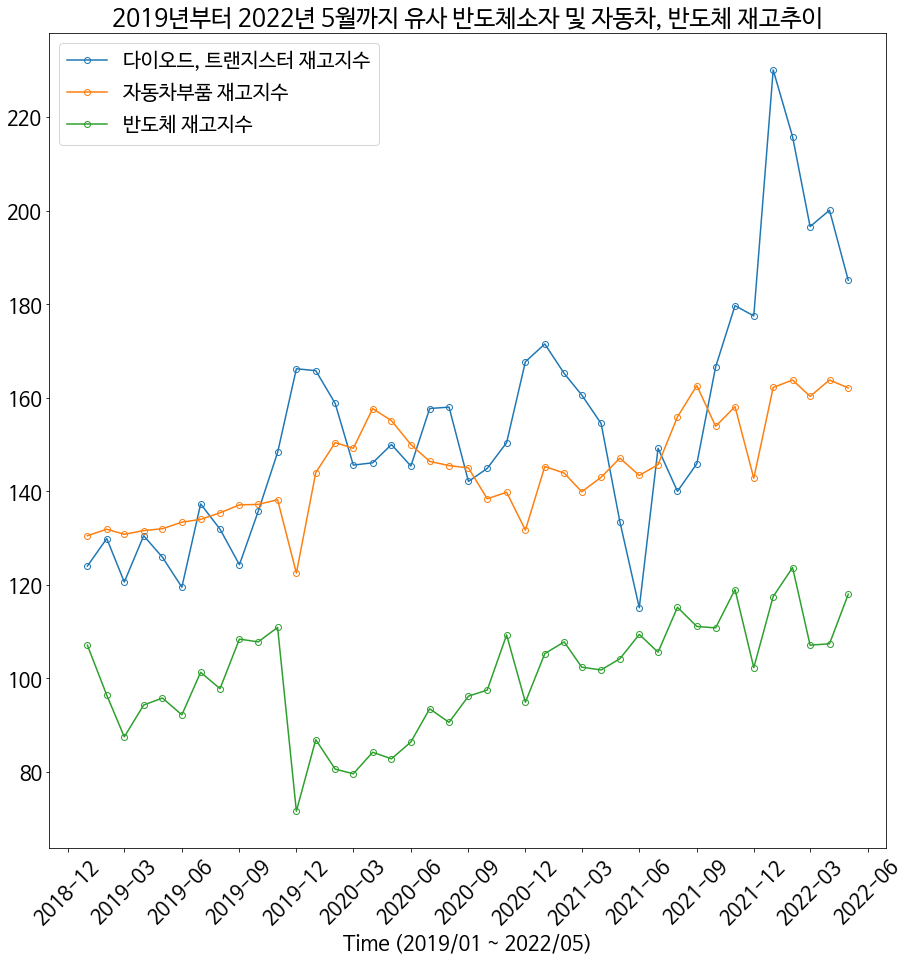

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(sobu_df['연도'], sobu_df["다이오드, 트랜지스터 및 유사 반도체소자-재고지수"], marker='o',markerfacecolor='none', label = "다이오드, 트랜지스터 재고지수")
ax.plot(sobu_df['연도'], sobu_df["자동차부품-재고지수"], marker='o',markerfacecolor='none', label = "자동차부품 재고지수")
ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-재고지수'], marker='o',markerfacecolor='none', label = "반도체 재고지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 유사 반도체소자 및 자동차, 반도체 재고추이')
plt.show()

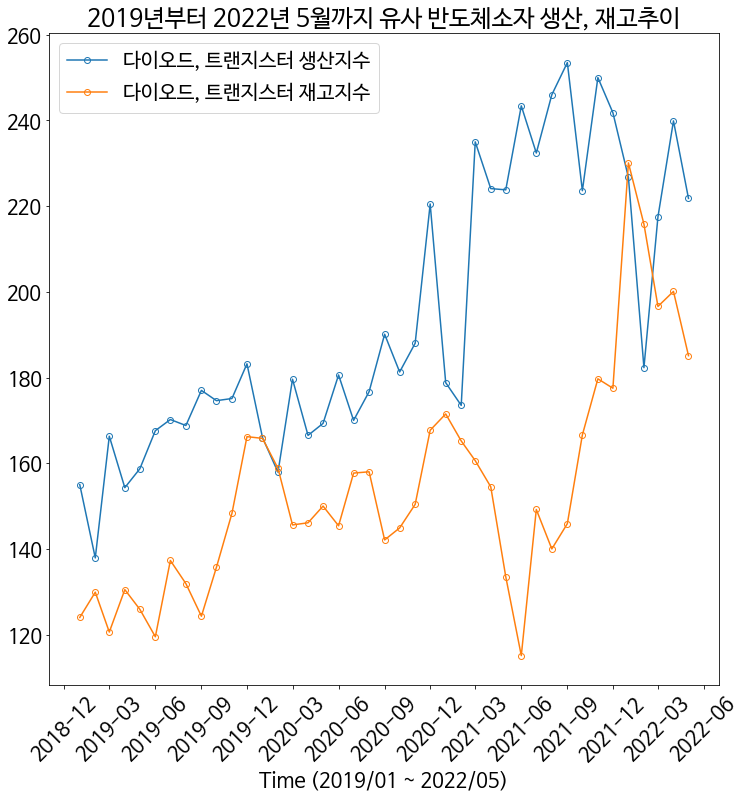

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(12,12))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(sobu_df['연도'], sobu_df["다이오드, 트랜지스터 및 유사 반도체소자-생산지수"], marker='o',markerfacecolor='none', label = "다이오드, 트랜지스터 생산지수")
ax.plot(sobu_df['연도'], sobu_df["다이오드, 트랜지스터 및 유사 반도체소자-재고지수"], marker='o',markerfacecolor='none', label = "다이오드, 트랜지스터 재고지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 유사 반도체소자 생산, 재고추이')
plt.show()

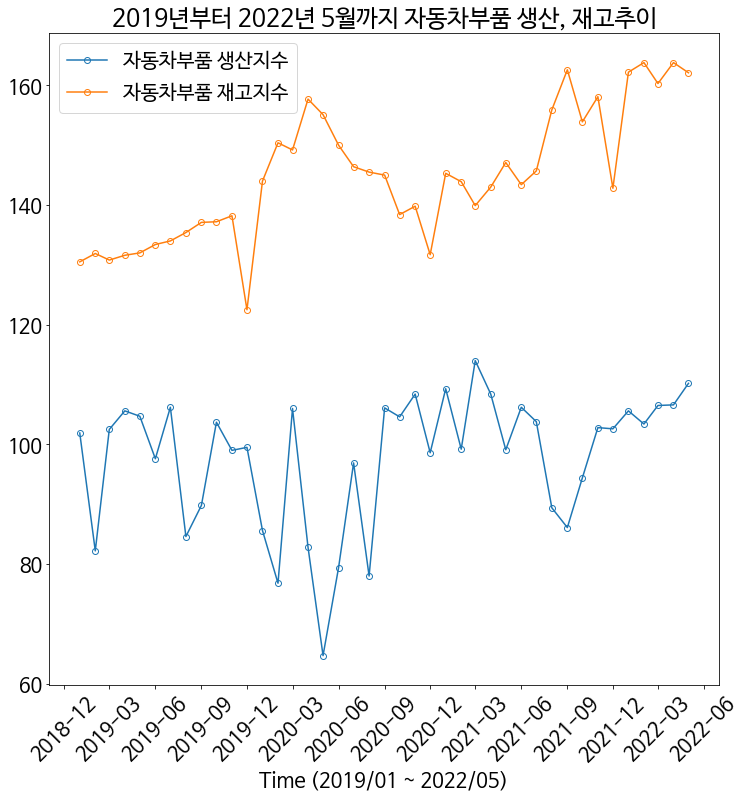

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(12,12))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(sobu_df['연도'], sobu_df["자동차부품-생산지수"], marker='o',markerfacecolor='none', label = "자동차부품 생산지수")
ax.plot(sobu_df['연도'], sobu_df["자동차부품-재고지수"], marker='o',markerfacecolor='none', label = "자동차부품 재고지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 자동차부품 생산, 재고추이')
plt.show()

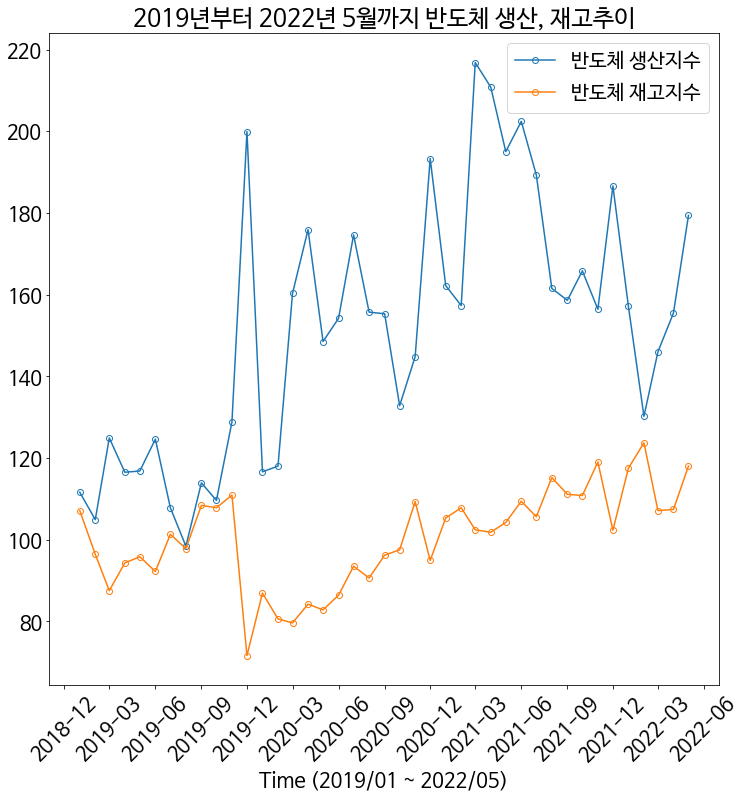

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(12,12))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-생산지수'], marker='o',markerfacecolor='none', label = "반도체 생산지수")
ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-재고지수'], marker='o',markerfacecolor='none', label = "반도체 재고지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 반도체 생산, 재고추이')
plt.show()

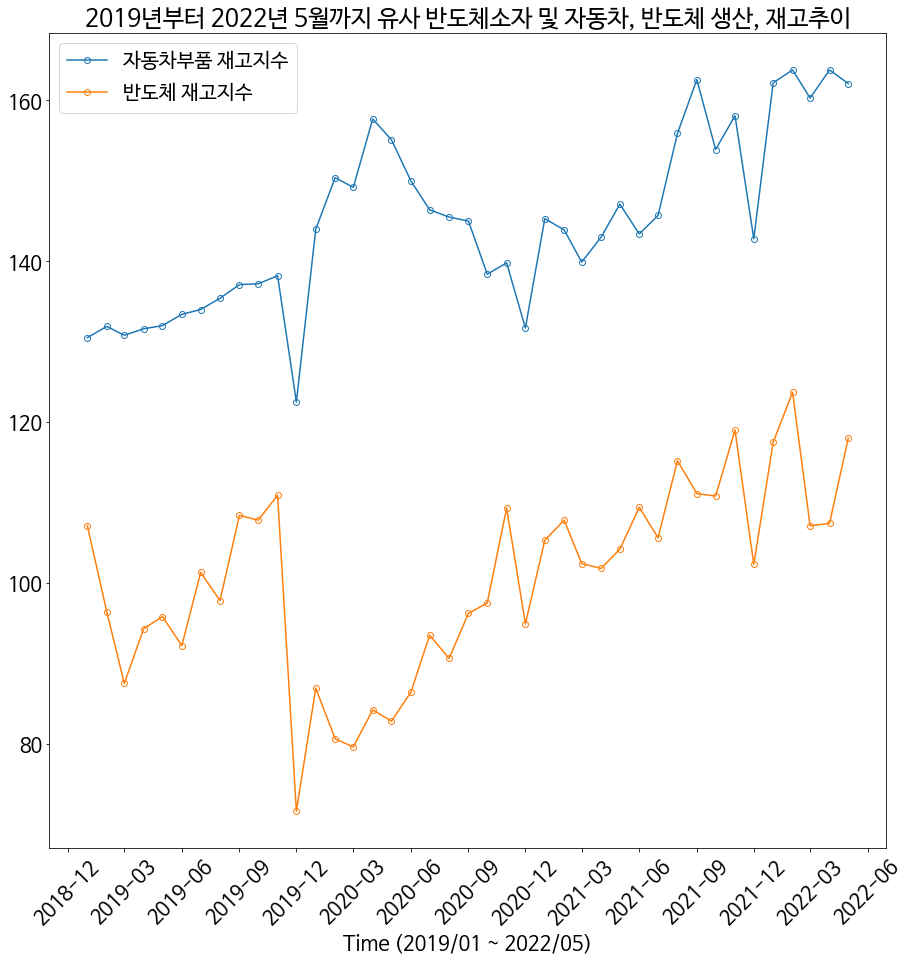

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(sobu_df['연도'], sobu_df["자동차부품-재고지수"], marker='o',markerfacecolor='none', label = "자동차부품 재고지수")
ax.plot(sobu_df['연도'], sobu_df['반도체·디스플레이장비-재고지수'], marker='o',markerfacecolor='none', label = "반도체 재고지수")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 유사 반도체소자 및 자동차, 반도체 생산, 재고추이')
plt.show()

In [ ]:
sobu_df["차이"] = sobu_df["자동차부품-재고지수"] - sobu_df['반도체·디스플레이장비-재고지수']

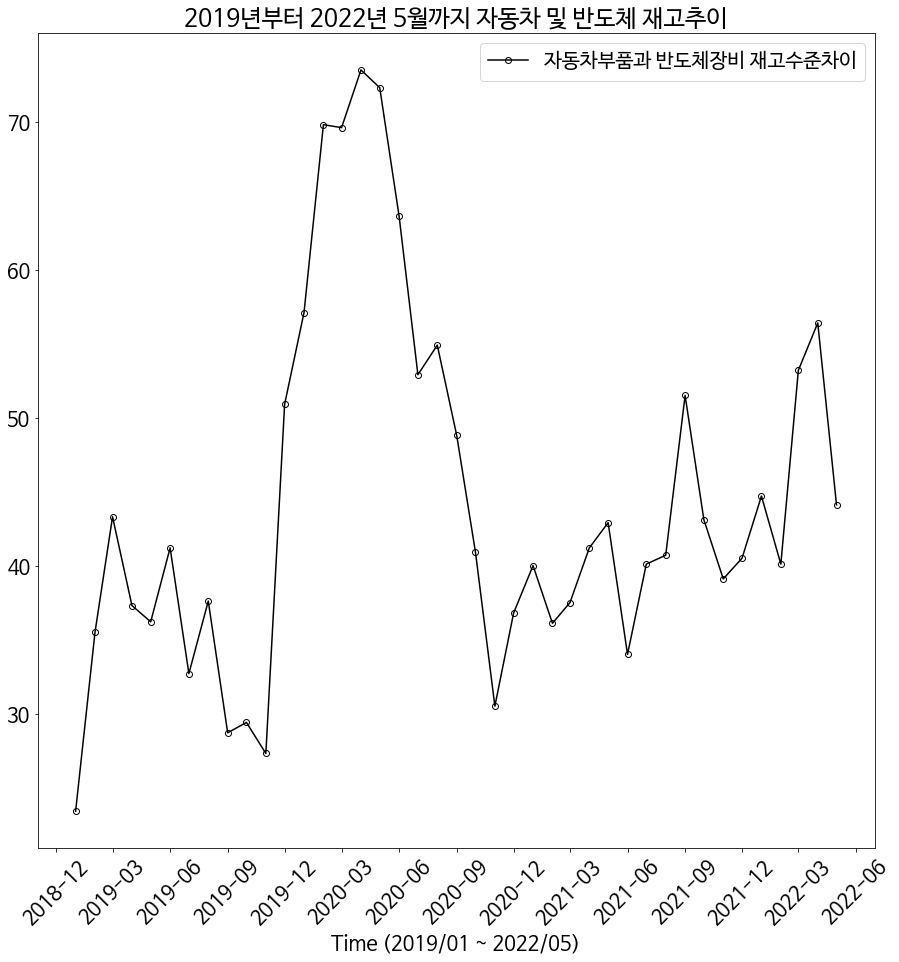

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(sobu_df['연도'], sobu_df["차이"], marker='o',markerfacecolor='none', color = "black", label = "자동차부품과 반도체장비 재고수준차이")


ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2022/05)')
plt.legend()

plt.title('2019년부터 2022년 5월까지 자동차 및 반도체 재고추이')
plt.show()

In [ ]:
sobu_df.head(3)

,연도,"다이오드, 트랜지스터 및 유사 반도체소자-생산지수","다이오드, 트랜지스터 및 유사 반도체소자-재고지수",자동차부품-생산지수,자동차부품-재고지수,반도체·디스플레이장비-생산지수,반도체·디스플레이장비-재고지수
0,2019-01-01,155.0,124.0,101.9,130.5,111.6,107.1
1,2019-02-01,137.9,129.9,82.2,131.9,104.9,96.4
2,2019-03-01,166.3,120.6,102.5,130.8,124.9,87.5


In [ ]:
so_corr_pro = sobu_df[["다이오드, 트랜지스터 및 유사 반도체소자-재고지수", "자동차부품-재고지수", "반도체·디스플레이장비-재고지수"]]
so_corr_sto = sobu_df[["다이오드, 트랜지스터 및 유사 반도체소자-생산지수", "자동차부품-생산지수", "반도체·디스플레이장비-생산지수"]]

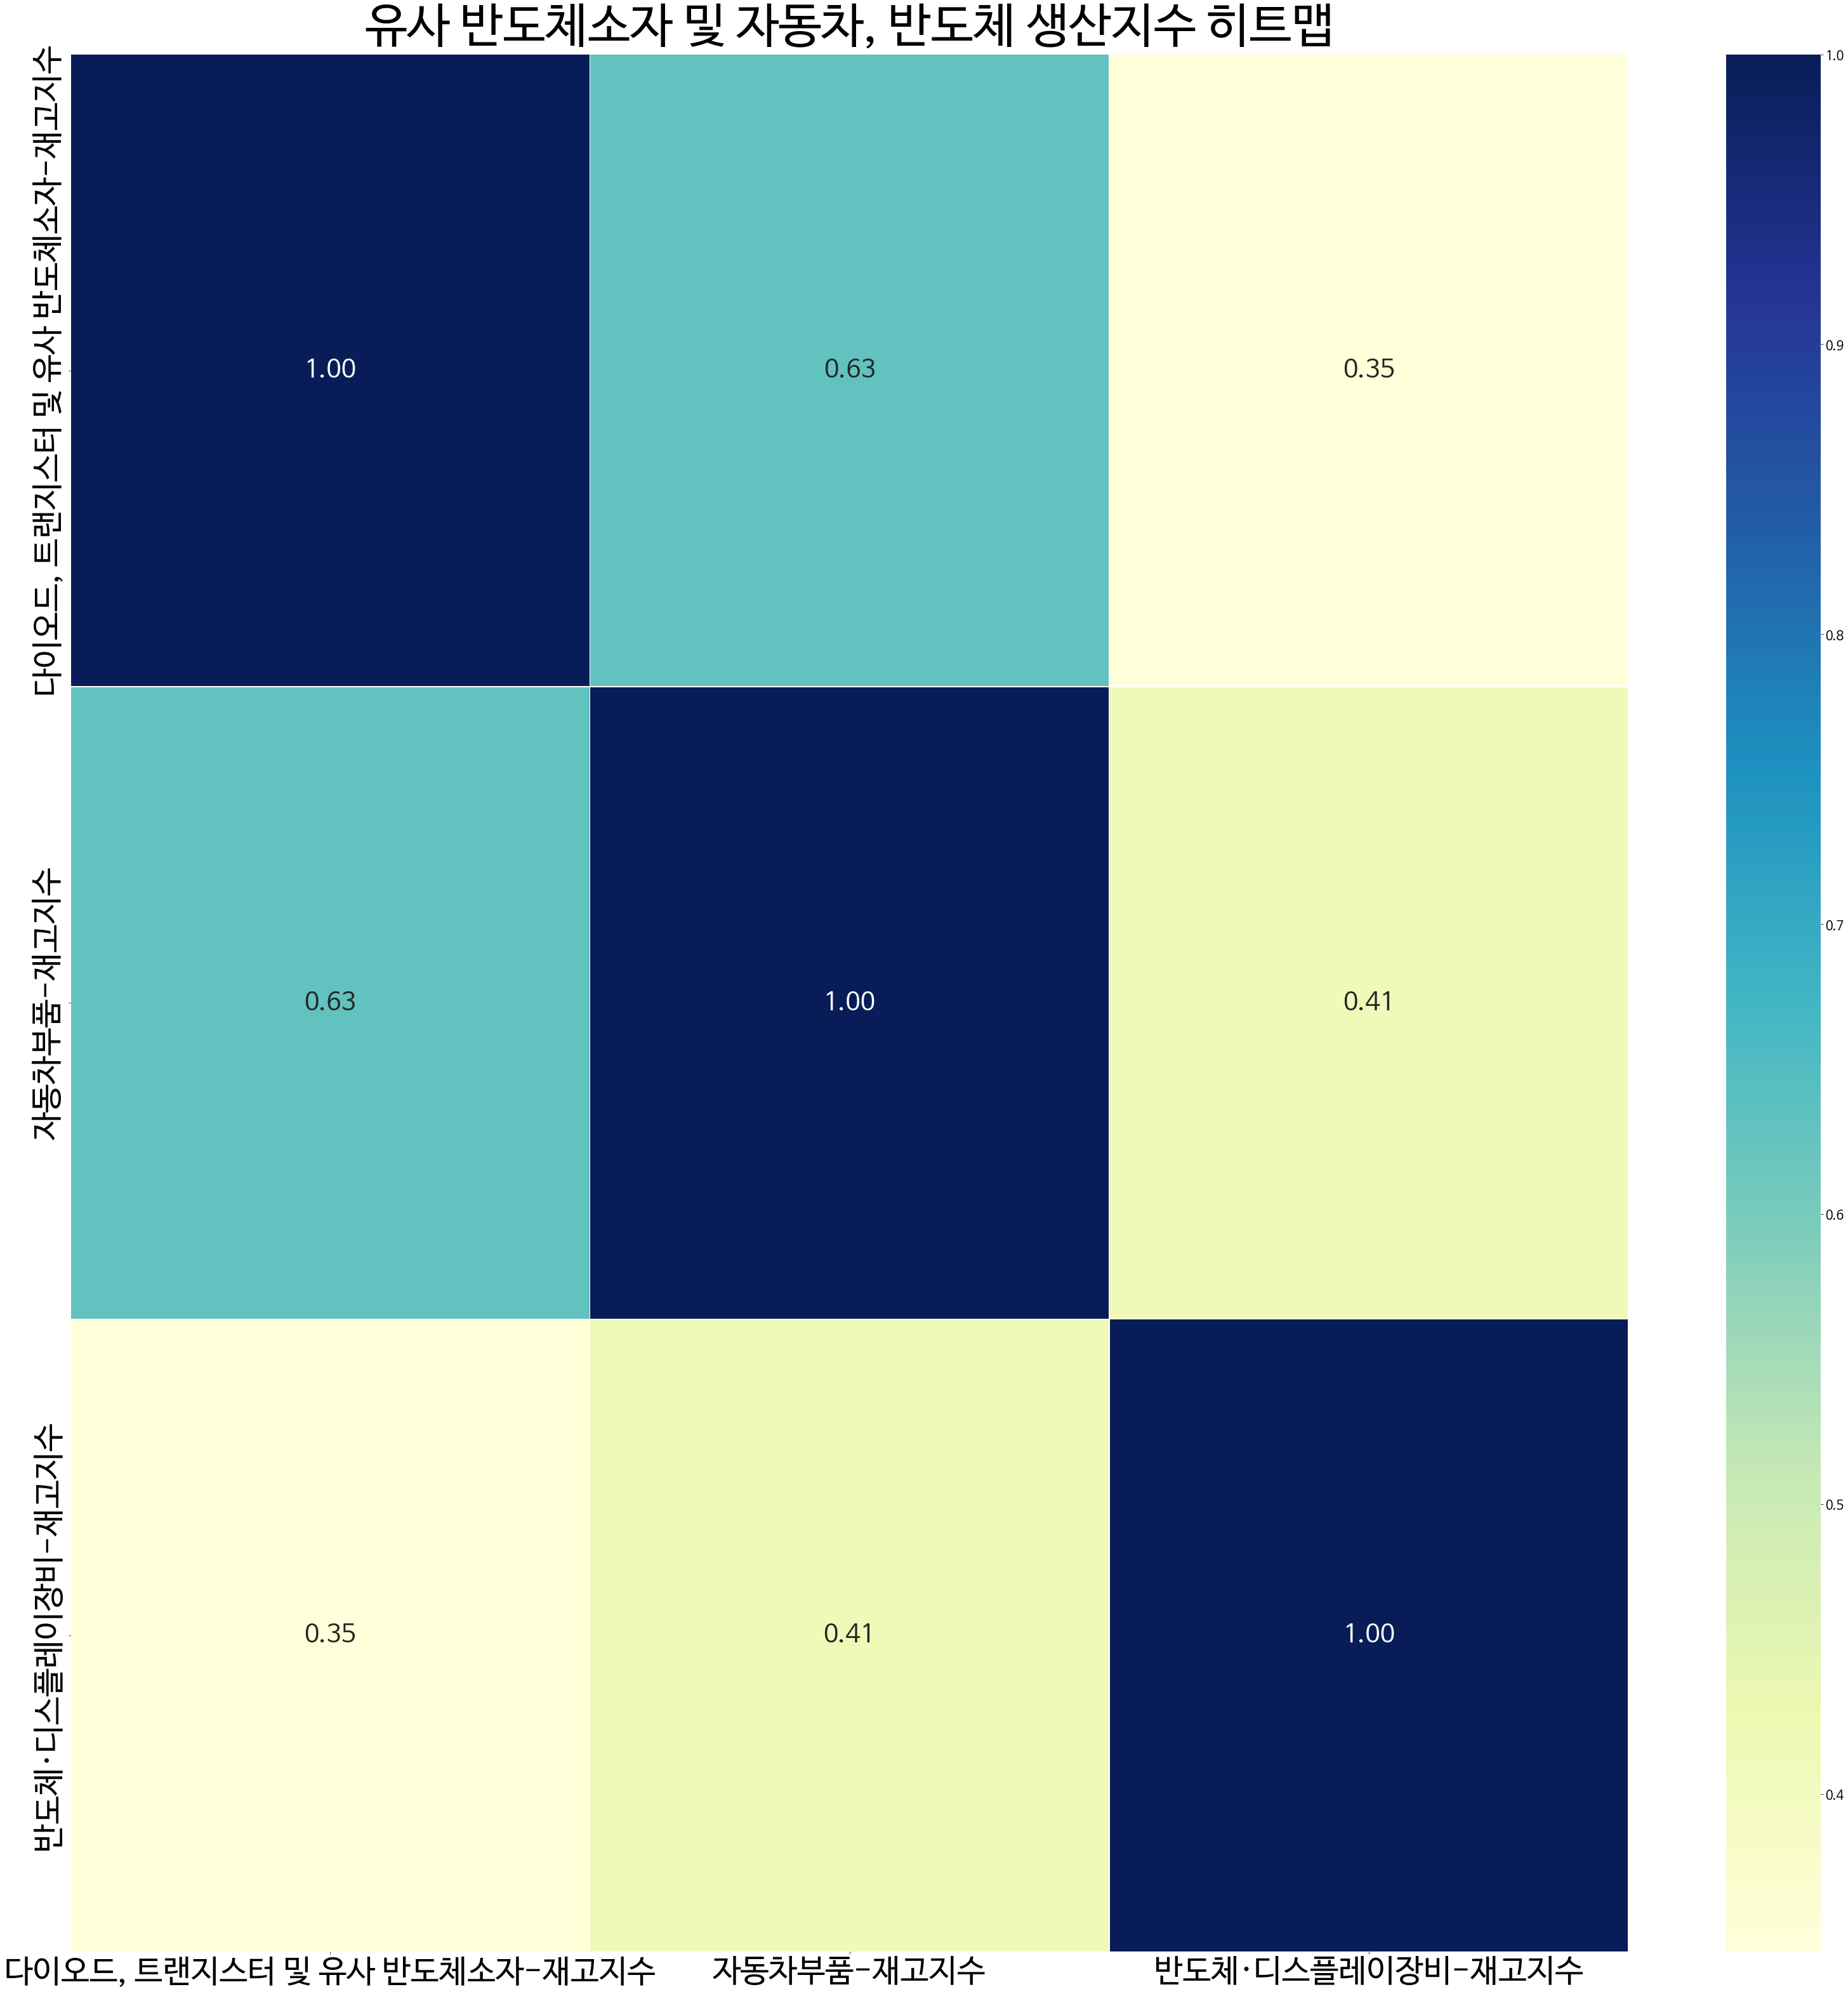

In [ ]:
fig, ax = plt.subplots(figsize=(55,55))
sns.heatmap(so_corr_pro.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.title("유사 반도체소자 및 자동차, 반도체 생산지수 히트맵", fontsize = 75)
plt.show()


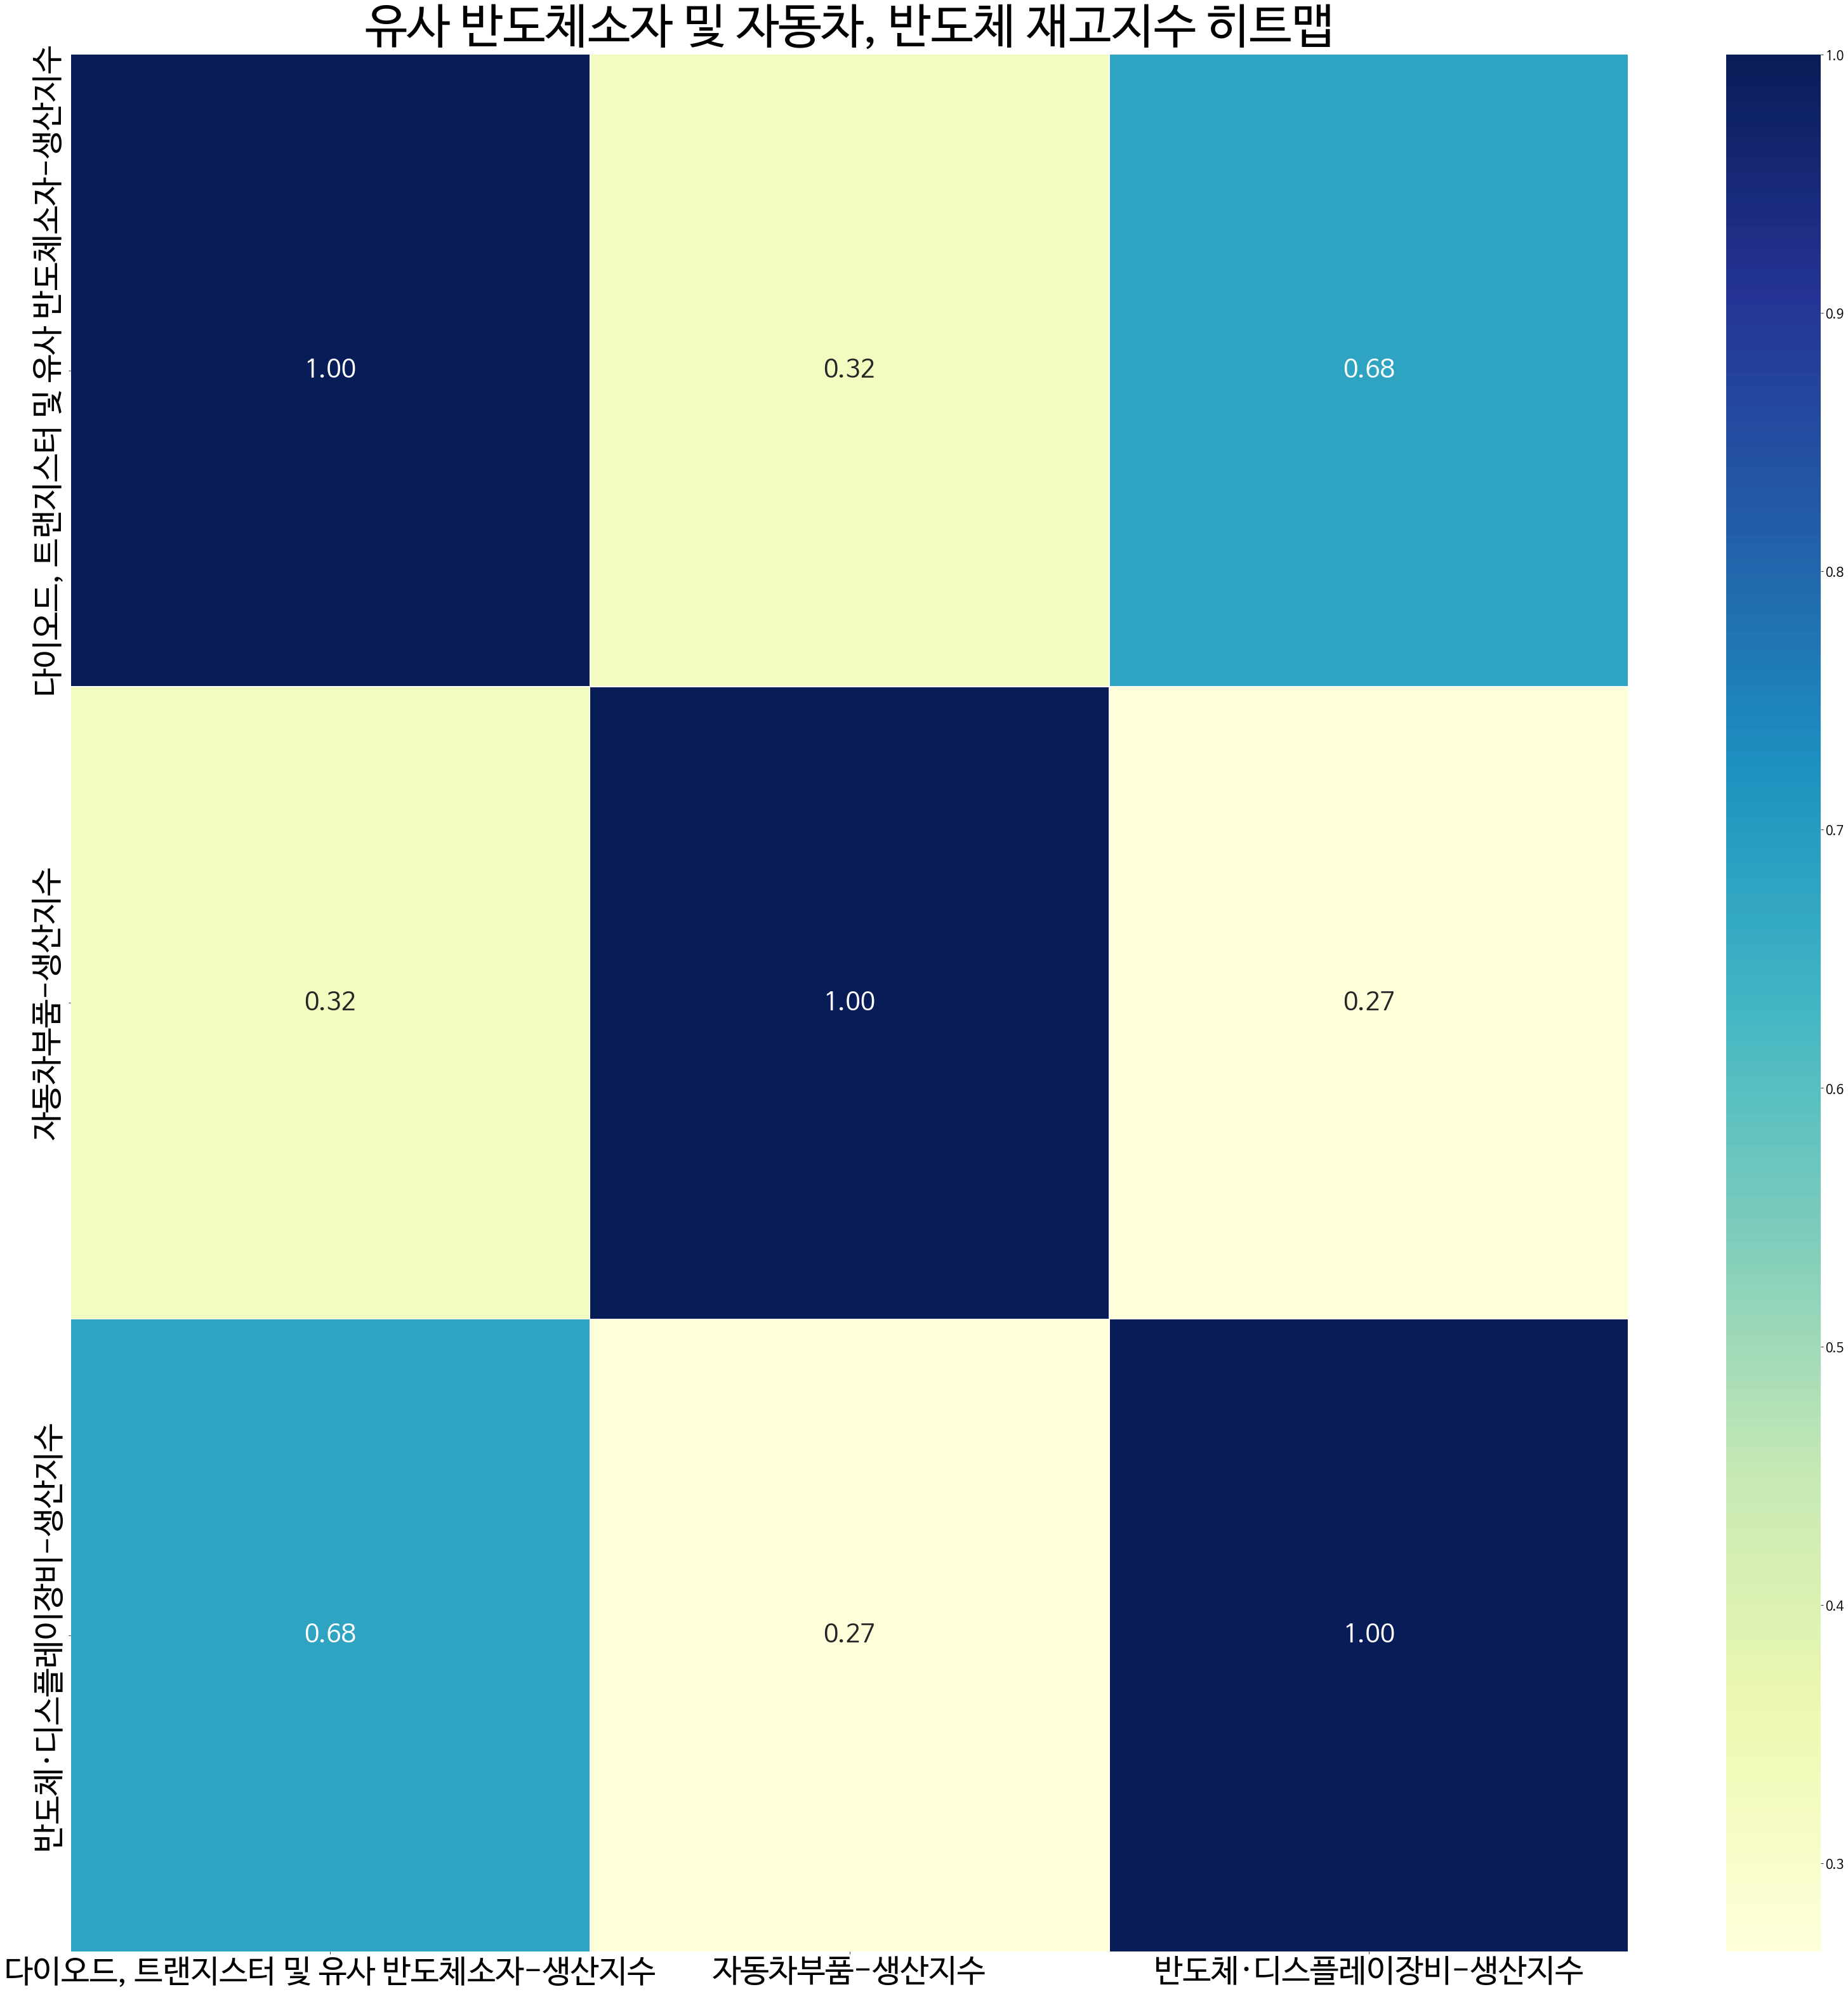

In [ ]:
fig, ax = plt.subplots(figsize=(55,55))
sns.heatmap(so_corr_sto.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.title("유사 반도체소자 및 자동차, 반도체 재고지수 히트맵", fontsize = 75)
plt.show()


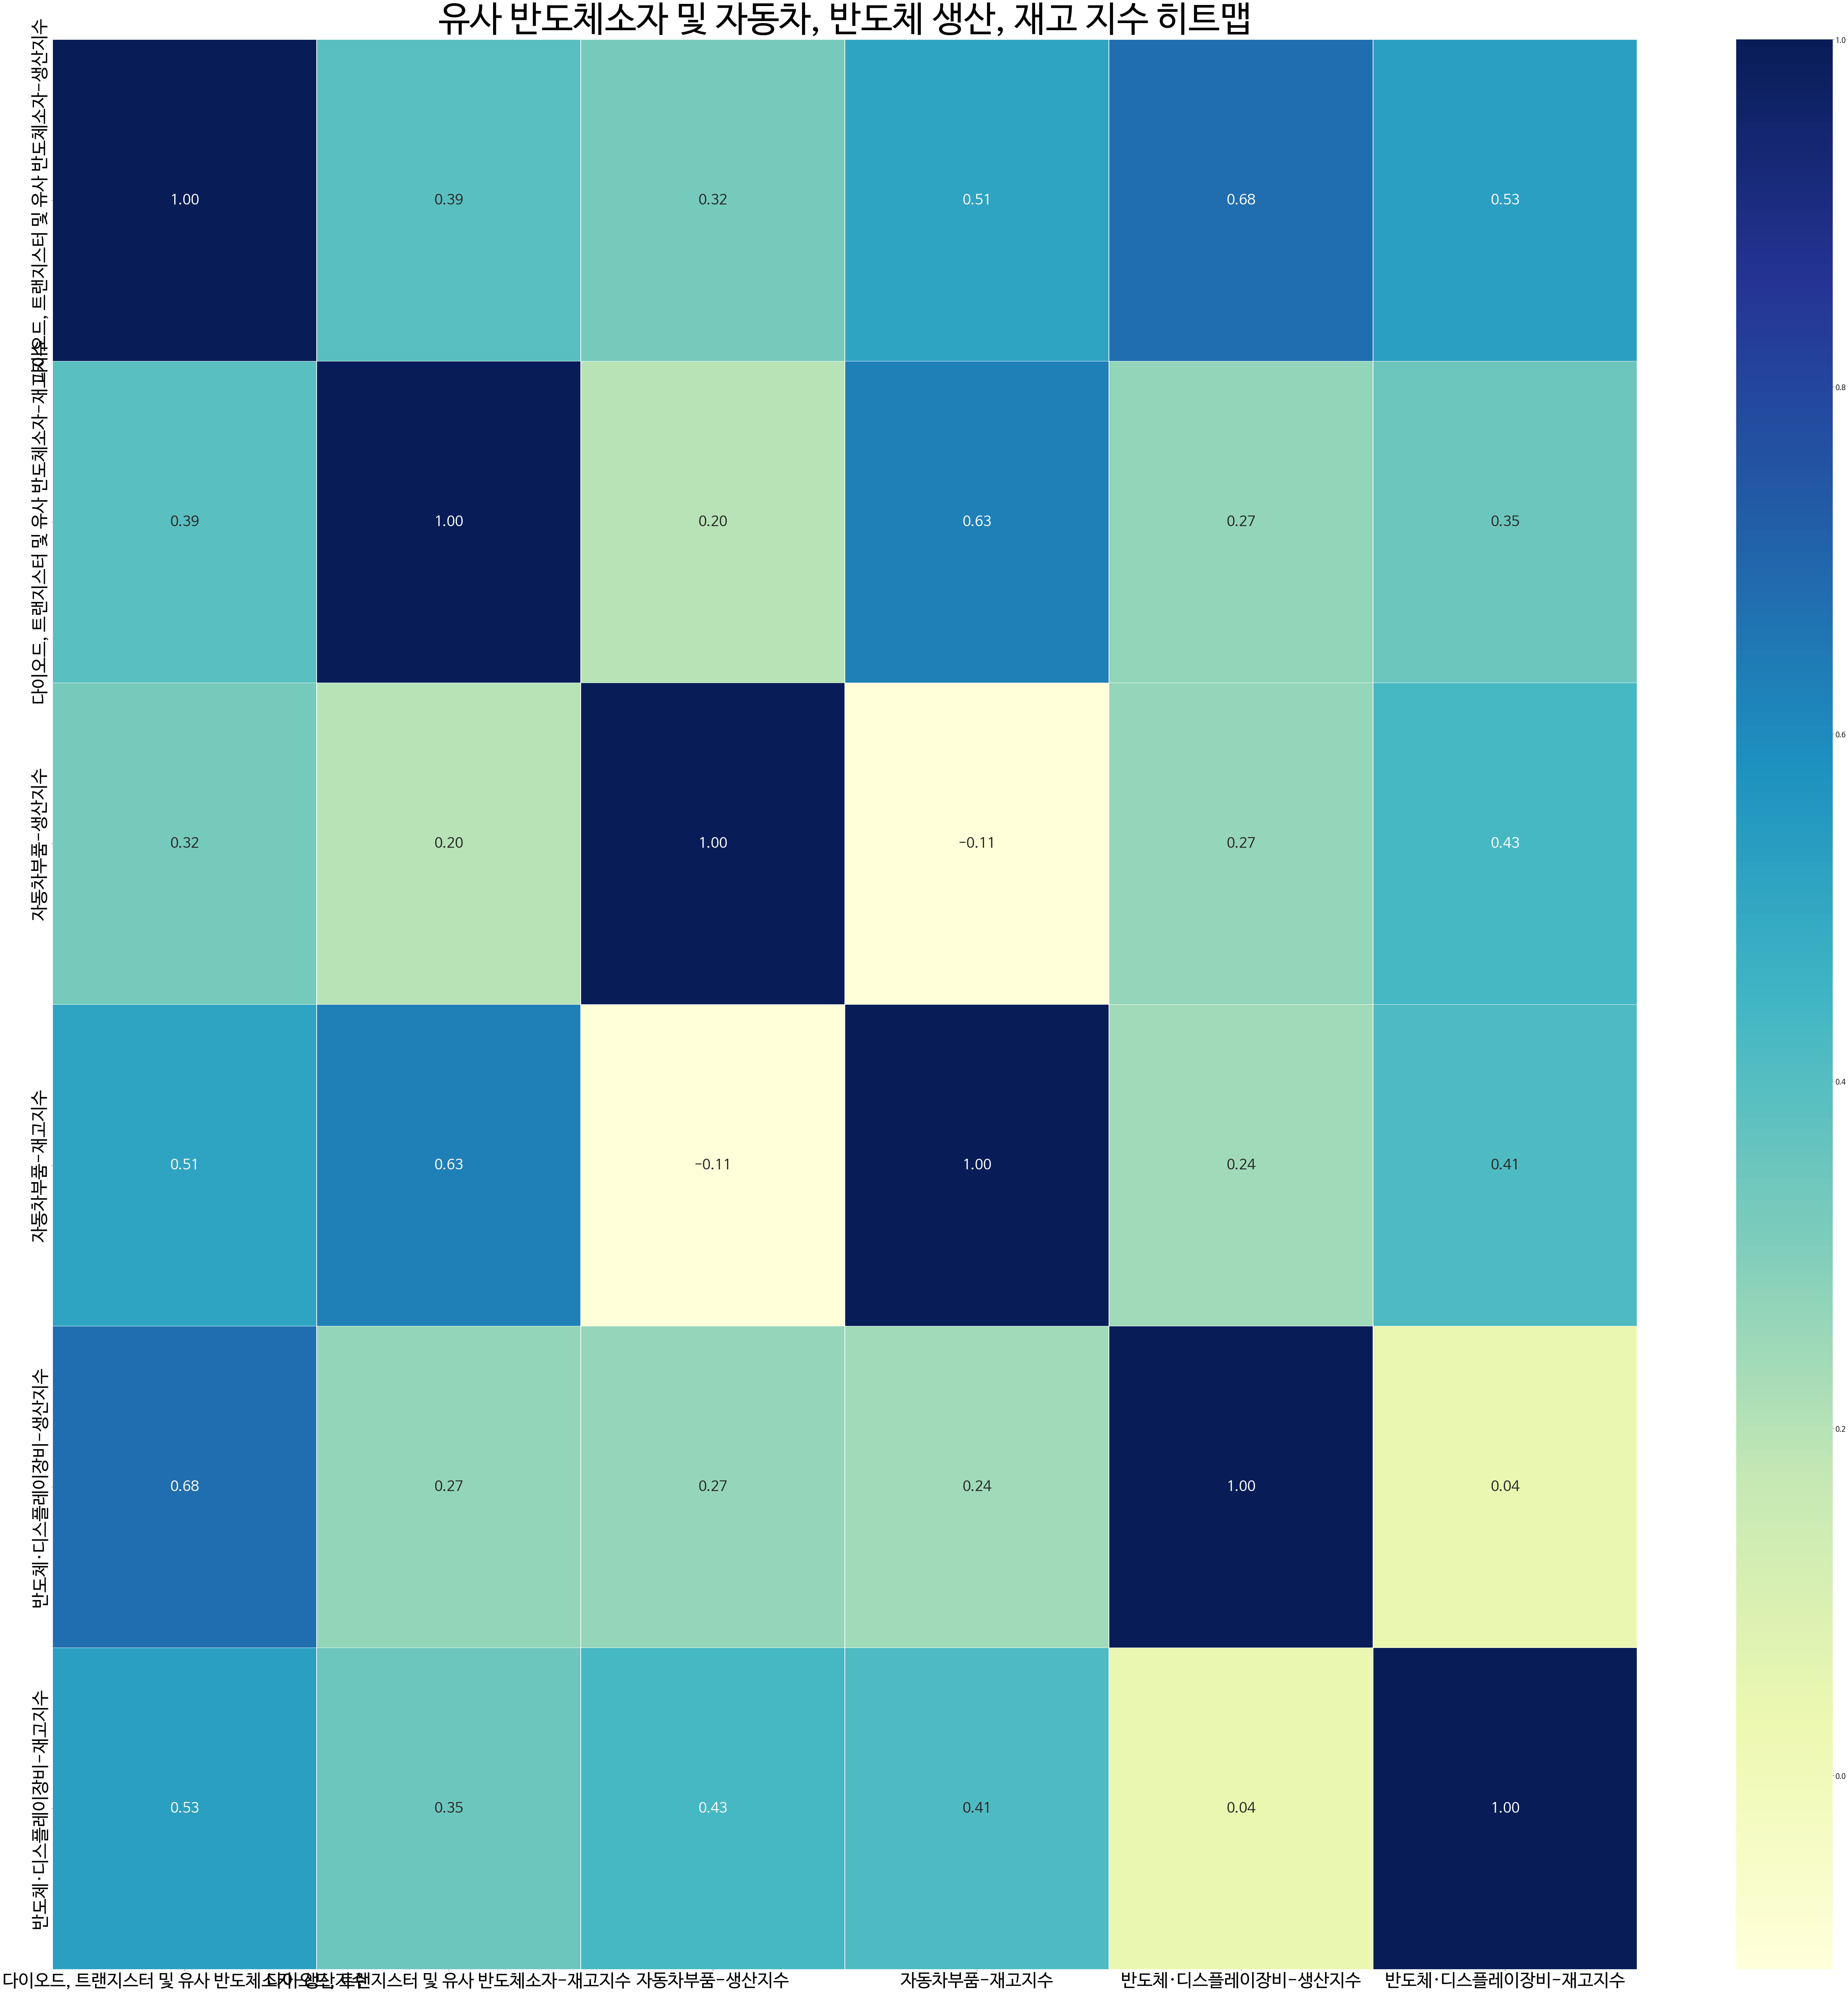

In [ ]:
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(sobu_df.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.title("유사 반도체소자 및 자동차, 반도체 생산, 재고 지수 히트맵", fontsize = 100)
plt.show()


In [ ]:
car_dt

,연도,자동차부품,반도체·디스플레이장비,차이
0,2019-01-01,130.5,107.1,23.4
1,2019-02-01,131.9,96.4,35.5
2,2019-03-01,130.8,87.5,43.3
3,2019-04-01,131.6,94.3,37.3
4,2019-05-01,132.0,95.8,36.2
5,2019-06-01,133.4,92.2,41.2
6,2019-07-01,134.0,101.3,32.7
7,2019-08-01,135.4,97.8,37.6
8,2019-09-01,137.1,108.4,28.7
9,2019-10-01,137.2,107.8,29.4


In [ ]:
pred_df = pd.read_csv("/content/drive/Shareddrives/소부장/데이터/자동차부품 반도체 재고/pred재고_연별월별.csv", encoding = "cp949")
pred_df["연도"] = pred_df["연도"].apply(lambda x: str(x)[0:4]+ "/" + str(x)[4:6])
pred_df["연도"] = pd.to_datetime(pred_df['연도'])


In [ ]:
import random

pred_x = pred_df.iloc[:40] 
pred_y = pred_df.iloc[40:]

#pred_y.자동차부품 = pred_y.자동차부품 + random.uniform(5, 8)
#pred_y.반도체·디스플레이장비 = pred_y.반도체·디스플레이장비 + random.uniform(5,8)

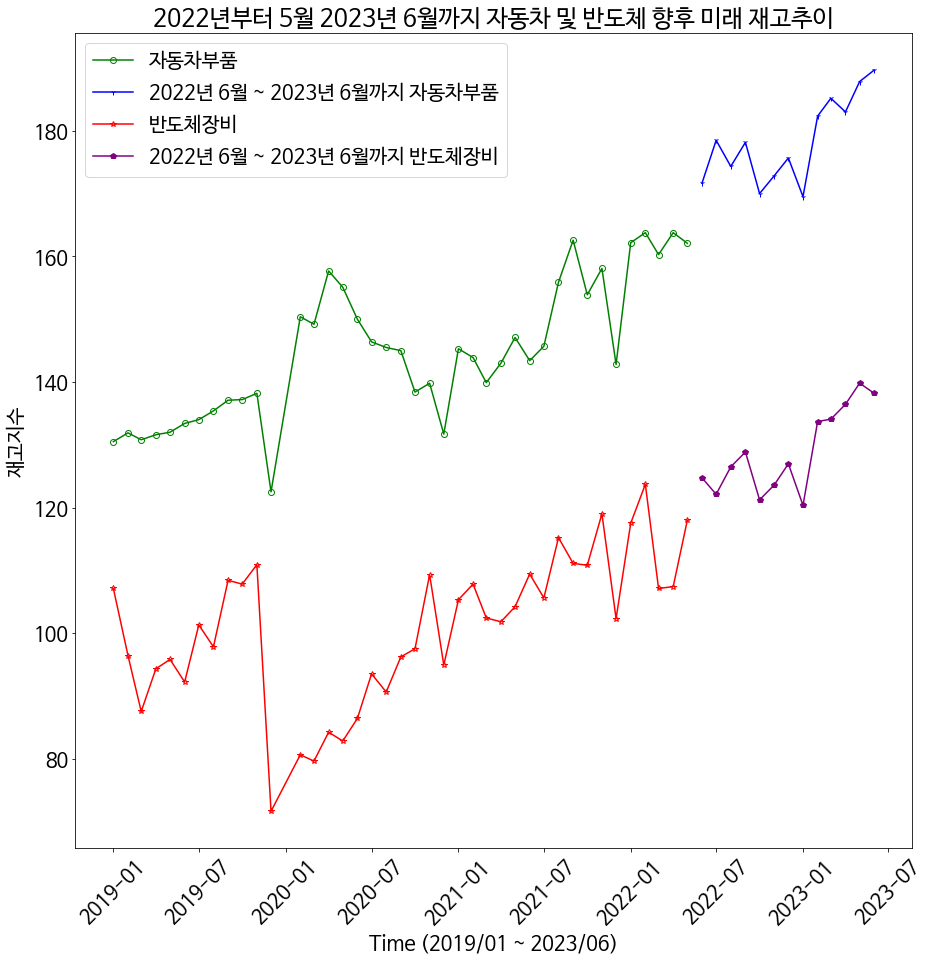

In [ ]:
from matplotlib import dates

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(pred_x['연도'], pred_x["자동차부품"], marker='o',markerfacecolor='none', color = "green", label = "자동차부품")
ax.plot(pred_y['연도'], pred_y["자동차부품"], color = "blue", marker='1', label = "2022년 6월 ~ 2023년 6월까지 자동차부품")

ax.plot(pred_x['연도'], pred_x['반도체·디스플레이장비'], marker='*',markerfacecolor='none', color = "red", label = "반도체장비")
ax.plot(pred_y['연도'], pred_y["반도체·디스플레이장비"],marker='p', color = "purple", label = "2022년 6월 ~ 2023년 6월까지 반도체장비")

plt.ylabel('재고지수')
#ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
plt.xticks(rotation=45)
plt.xlabel('Time (2019/01 ~ 2023/06)')
plt.legend()

plt.title('2022년부터 5월 2023년 6월까지 자동차 및 반도체 향후 미래 재고추이')
plt.show()